In [1]:
from Bio import AlignIO
import itertools
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Clustering
## group ortholog 13430

In [2]:
# clustering, dico ini
start = '(?:(?:[G]{1}.[G]{2})|(?:[G]{2}))'
end = '(?:(?:[G]{2}.[G]{1})|(?:[G]{2}))'
dicoRegEx = {'Restrained region': start+'.{1,}'+end,
        'Loops': '(?=([^G]{1,}G{0,1}[^G]{1,}){1,})',
        'G-track': '(?=([G]{3,})|([G]{2,}.[G]{1,})|([G]{1,}.[G]{2,}))',
        'Gtrack with buldge': '(?=([G]{1,}.{1}[G]{1,}))',
        'JM canonical motif': r"(?i)(?P<run>g{3,})(.{1,7}?)(?P=run)(.{1,7}?)"+\
             "(?P=run)(.{1,7}?)(?P=run)",
        'all possible match': '(?=(G{2,}.{1,}G{2,}.{1,}G{2,}.{1,}G{2,}))'}

#ini codon

#ini df
dicoDF = {'Nb G-track': [], 'length G-track': [], 'Gene': [],
            'Nb G-track with bulges': [], 'Loop length': [], 'GrpOrtho': [],
            'LengthRegion': [], 'Nb canonical': [], 'Nb non canonical': []}

bases = ['A', 'T', 'C', 'G']
codons = [''.join(p) for p in itertools.product(bases, repeat=3)]
for c in codons:
    dicoDF[c] = []

In [3]:
align = AlignIO.read("/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_13430.fa", "fasta")
G4align13430 = align[:, 86:222]

In [4]:
for record in G4align13430 :
    seq = str(record.seq).replace('-', '')
    gene = gene = record.id.split(':')[0]
    if re.search(dicoRegEx['Restrained region'], seq):
        G4 = re.findall(dicoRegEx['Restrained region'], seq)[0]
        loops = re.findall(dicoRegEx['Loops'], G4)
        gTrack = re.findall(dicoRegEx['G-track'], G4)
        canonical = re.findall(dicoRegEx['JM canonical motif'], G4)
        allpG4 = re.findall(dicoRegEx['all possible match'], G4)

        cptGTrackWithBuldge = 0
        lenGtrack = []
        for gt in gTrack:
            for g in gt:
                lenGtrack.append(len(g))
                gTrackWithBludges = re.findall(dicoRegEx['Gtrack with buldge'], g)
                cptGTrackWithBuldge += len(gTrackWithBludges)

        for c in codons:
            cptCodon = 0
            for l in loops:
                cptCodon += l.count(c)
            dicoDF[c].append(cptCodon/float(len(seq)))

        lenLoop = [len(i) for i in loops]
        if len(lenLoop) > 0:
            dicoDF['Loop length'].append( sum(lenLoop)/len(lenLoop) )
        else:
            loops2 = re.findall('([^G]{1,})', G4)
            lenLoop2 = [len(i) for i in loops2]
            if len(lenLoop2) > 0:
                dicoDF['Loop length'].append( sum(lenLoop2)/len(lenLoop2) )
            else:
                dicoDF['Loop length'].append( 0 )
        if len(lenGtrack) > 0:
            dicoDF['length G-track'].append( sum(lenGtrack)/len(lenGtrack) )
        else:
            gTrack2 = re.findall('[G]{2,}', G4)
            lenGtrack2 = []
            for gt in gTrack2:
                for g in gt:
                    lenGtrack2.append(len(g))
            if len(lenGtrack2) > 0:
                dicoDF['length G-track'].append( sum(lenGtrack2)/len(lenGtrack2) )
            else:
                dicoDF['length G-track'].append( 0 )
        dicoDF['Nb G-track'].append( len(gTrack) )
        dicoDF['Nb G-track with bulges'].append( cptGTrackWithBuldge )
        dicoDF['Nb canonical'].append(len(canonical))
        nbNonCan = len(allpG4) - len(canonical) +1 / float( len(seq) )*1000
        dicoDF['Nb non canonical'].append(nbNonCan)
        dicoDF['LengthRegion'].append(len(G4))
        dicoDF['Gene'].append(gene)
#         if gene in ['Hbut_1639', 'OE_3954R', 'CAC11255', 'SSO0776', 'PAE0660']:
#         if gene in ['Hbut_1639', 'OE_3954R', 'AF_1740']:
#             dicoDF['Grp'].append(0)
#         else:
#             dicoDF['Grp'].append(1)
        dicoDF['GrpOrtho'].append('13430')

## group ortholog 10022

In [5]:
align = AlignIO.read("/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_10022.fa", "fasta")
# AlignIO.write(align[:, 1243:1441], "/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_10022_1243-1441.fa", "fasta")
G4align10022 = align[:, 1243:1441]

In [6]:
for record in G4align10022 :
    seq = str(record.seq).replace('-', '')
    gene = gene = record.id.split(':')[0]
    if re.search(dicoRegEx['Restrained region'], seq):
        G4 = re.findall(dicoRegEx['Restrained region'], seq)[0]
        loops = re.findall(dicoRegEx['Loops'], G4)
        gTrack = re.findall(dicoRegEx['G-track'], G4)
        canonical = re.findall(dicoRegEx['JM canonical motif'], G4)
        allpG4 = re.findall(dicoRegEx['all possible match'], G4)

        cptGTrackWithBuldge = 0
        lenGtrack = []
        for gt in gTrack:
            for g in gt:
                lenGtrack.append(len(g))
                gTrackWithBludges = re.findall(dicoRegEx['Gtrack with buldge'], g)
                cptGTrackWithBuldge += len(gTrackWithBludges)

        for c in codons:
            cptCodon = 0
            for l in loops:
                cptCodon += l.count(c)
            dicoDF[c].append(cptCodon/float(len(seq)))

        lenLoop = [len(i) for i in loops]
        if len(lenLoop) > 0:
            dicoDF['Loop length'].append( sum(lenLoop)/len(lenLoop) )
        else:
            loops2 = re.findall('([^G]{1,})', G4)
            lenLoop2 = [len(i) for i in loops2]
            if len(lenLoop2) > 0:
                dicoDF['Loop length'].append( sum(lenLoop2)/len(lenLoop2) )
            else:
                dicoDF['Loop length'].append( 0 )
        if len(lenGtrack) > 0:
            dicoDF['length G-track'].append( sum(lenGtrack)/len(lenGtrack) )
        else:
            gTrack2 = re.findall('[G]{2,}', G4)
            lenGtrack2 = []
            for gt in gTrack2:
                for g in gt:
                    lenGtrack2.append(len(g))
            if len(lenGtrack2) > 0:
                dicoDF['length G-track'].append( sum(lenGtrack2)/len(lenGtrack2) )
            else:
                dicoDF['length G-track'].append( 0 )
        dicoDF['Nb G-track'].append( len(gTrack) )
        dicoDF['Nb G-track with bulges'].append( cptGTrackWithBuldge )
        dicoDF['Nb canonical'].append(len(canonical))
        nbNonCan = len(allpG4) - len(canonical) +1 / float( len(seq) )*1000
        dicoDF['Nb non canonical'].append(nbNonCan)
        dicoDF['LengthRegion'].append(len(G4))
        dicoDF['Gene'].append(gene)
#         if gene in ['WD_0394', 'aq_1139', 'BSU15210', 'BSU14850', 'SP_1067', 'EF_2457', 'BB_0302', 'Cj1038', 'FTT_0452', 'BAB42210', 'lpp2668', 'CT_760', 'HI_1137']:
#             dicoDF['Grp'].append(2)
#         else:
#             dicoDF['Grp'].append(1)
        dicoDF['GrpOrtho'].append('10022')



## add grp 293

In [7]:
align = AlignIO.read("/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_293.fa", "fasta")
# AlignIO.write(align[:, 1243:1441], "/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_10022_1243-1441.fa", "fasta")
G4align293 = align[:, 741:930]

for record in G4align293 :
    seq = str(record.seq).replace('-', '')
    gene = gene = record.id.split(':')[0]
    if re.search(dicoRegEx['Restrained region'], seq):
        G4 = re.findall(dicoRegEx['Restrained region'], seq)[0]
        loops = re.findall(dicoRegEx['Loops'], G4)
        gTrack = re.findall(dicoRegEx['G-track'], G4)
        canonical = re.findall(dicoRegEx['JM canonical motif'], G4)
        allpG4 = re.findall(dicoRegEx['all possible match'], G4)

        cptGTrackWithBuldge = 0
        lenGtrack = []
        for gt in gTrack:
            for g in gt:
                lenGtrack.append(len(g))
                gTrackWithBludges = re.findall(dicoRegEx['Gtrack with buldge'], g)
                cptGTrackWithBuldge += len(gTrackWithBludges)

        for c in codons:
            cptCodon = 0
            for l in loops:
                cptCodon += l.count(c)
            dicoDF[c].append(cptCodon/float(len(seq)))

        lenLoop = [len(i) for i in loops]
        if len(lenLoop) > 0:
            dicoDF['Loop length'].append( sum(lenLoop)/len(lenLoop) )
        else:
            loops2 = re.findall('([^G]{1,})', G4)
            lenLoop2 = [len(i) for i in loops2]
            if len(lenLoop2) > 0:
                dicoDF['Loop length'].append( sum(lenLoop2)/len(lenLoop2) )
            else:
                dicoDF['Loop length'].append( 0 )
        if len(lenGtrack) > 0:
            dicoDF['length G-track'].append( sum(lenGtrack)/len(lenGtrack) )
        else:
            gTrack2 = re.findall('[G]{2,}', G4)
            lenGtrack2 = []
            for gt in gTrack2:
                for g in gt:
                    lenGtrack2.append(len(g))
            if len(lenGtrack2) > 0:
                dicoDF['length G-track'].append( sum(lenGtrack2)/len(lenGtrack2) )
            else:
                dicoDF['length G-track'].append( 0 )
        dicoDF['Nb G-track'].append( len(gTrack) )
        dicoDF['Nb G-track with bulges'].append( cptGTrackWithBuldge )
        dicoDF['Nb canonical'].append(len(canonical))
        nbNonCan = len(allpG4) - len(canonical) +1 / float( len(seq) )*1000
        dicoDF['Nb non canonical'].append(nbNonCan)
        dicoDF['LengthRegion'].append(len(G4))
        dicoDF['Gene'].append(gene)
#         if gene in ['WD_0394', 'aq_1139', 'BSU15210', 'BSU14850', 'SP_1067', 'EF_2457', 'BB_0302', 'Cj1038', 'FTT_0452', 'BAB42210', 'lpp2668', 'CT_760', 'HI_1137']:
#             dicoDF['Grp'].append(2)
#         else:
#             dicoDF['Grp'].append(1)
        dicoDF['GrpOrtho'].append('293')

## add grp 22

In [8]:
align = AlignIO.read("/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_293.fa", "fasta")
# AlignIO.write(align[:, 1243:1441], "/home/anais/Documents/Projet/G4Evolution/Alignment/grpOrtho_10022_1243-1441.fa", "fasta")
G4align22 = align[:, 860:1198]

for record in G4align22 :
    seq = str(record.seq).replace('-', '')
    gene = gene = record.id.split(':')[0]
    if re.search(dicoRegEx['Restrained region'], seq):
        G4 = re.findall(dicoRegEx['Restrained region'], seq)[0]
        loops = re.findall(dicoRegEx['Loops'], G4)
        gTrack = re.findall(dicoRegEx['G-track'], G4)
        canonical = re.findall(dicoRegEx['JM canonical motif'], G4)
        allpG4 = re.findall(dicoRegEx['all possible match'], G4)

        cptGTrackWithBuldge = 0
        lenGtrack = []
        for gt in gTrack:
            for g in gt:
                lenGtrack.append(len(g))
                gTrackWithBludges = re.findall(dicoRegEx['Gtrack with buldge'], g)
                cptGTrackWithBuldge += len(gTrackWithBludges)

        for c in codons:
            cptCodon = 0
            for l in loops:
                cptCodon += l.count(c)
            dicoDF[c].append(cptCodon/float(len(seq)))

        lenLoop = [len(i) for i in loops]
        if len(lenLoop) > 0:
            dicoDF['Loop length'].append( sum(lenLoop)/len(lenLoop) )
        else:
            loops2 = re.findall('([^G]{1,})', G4)
            lenLoop2 = [len(i) for i in loops2]
            if len(lenLoop2) > 0:
                dicoDF['Loop length'].append( sum(lenLoop2)/len(lenLoop2) )
            else:
                dicoDF['Loop length'].append( 0 )
        if len(lenGtrack) > 0:
            dicoDF['length G-track'].append( sum(lenGtrack)/len(lenGtrack) )
        else:
            gTrack2 = re.findall('[G]{2,}', G4)
            lenGtrack2 = []
            for gt in gTrack2:
                for g in gt:
                    lenGtrack2.append(len(g))
            if len(lenGtrack2) > 0:
                dicoDF['length G-track'].append( sum(lenGtrack2)/len(lenGtrack2) )
            else:
                dicoDF['length G-track'].append( 0 )
        dicoDF['Nb G-track'].append( len(gTrack) )
        dicoDF['Nb G-track with bulges'].append( cptGTrackWithBuldge )
        dicoDF['Nb canonical'].append(len(canonical))
        nbNonCan = len(allpG4) - len(canonical) +1 / float( len(seq) )*1000
        dicoDF['Nb non canonical'].append(nbNonCan)
        dicoDF['LengthRegion'].append(len(G4))
        dicoDF['Gene'].append(gene)
#         if gene in ['WD_0394', 'aq_1139', 'BSU15210', 'BSU14850', 'SP_1067', 'EF_2457', 'BB_0302', 'Cj1038', 'FTT_0452', 'BAB42210', 'lpp2668', 'CT_760', 'HI_1137']:
#             dicoDF['Grp'].append(2)
#         else:
#             dicoDF['Grp'].append(1)
        dicoDF['GrpOrtho'].append('22')

## Final df

In [9]:
df = pd.DataFrame(data=dicoDF)
df

Nb G-track  length G-track       Gene  Nb G-track with bulges  \
0           19        1.438596    AF_1740                      35   
1           13        1.384615   Msm_0850                      21   
2           17        1.588235   BAA29417                      38   
3           14        1.309524    MA_3306                      23   
4            7        1.380952  Hbut_1639                      11   
..         ...             ...        ...                     ...   
85          11        1.151515   BAA30953                      16   
86          20        1.433333    MA_0914                      35   
87          33        1.383838    AF_2363                      57   
88          18        1.222222  MXAN_6697                      28   
89          15        1.355556   Msm_1158                      25   

    Loop length GrpOrtho  LengthRegion  Nb canonical  Nb non canonical  \
0      5.036364    13430           115             0         25.407407   
1      9.342857    13430           118             0         17.407407   
2      6.147541    13430           116             0         24.407407   
3      5.758065    13430           116             0         25.352941   
4      5.576923    13430            98             0         21.692308   
..          ...      ...           ...           ...               ...   
85     7.489362       22           212             0         20.184100   
86     8.603261       22           296             0         33.257329   
87     7.475000       22           280             0         33.257329   
88     5.945736       22           222             0         24.347826   
89    10.303571       22           237             0         18.472222   

         AAA  ...       GTC  GTG       GCA       GCT       GCC  GCG  GGA  GGT  \
0   0.051852  ...  0.000000  0.0  0.000000  0.000000  0.022222  0.0  0.0  0.0   
1   0.414815  ...  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   
2   0.059259  ...  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   
3   0.007353  ...  0.000000  0.0  0.051471  0.000000  0.022059  0.0  0.0  0.0   
4   0.038462  ...  0.000000  0.0  0.000000  0.038462  0.000000  0.0  0.0  0.0   
..       ...  ...       ...  ...       ...       ...       ...  ...  ...  ...   
85  0.196653  ...  0.000000  0.0  0.020921  0.046025  0.000000  0.0  0.0  0.0   
86  0.006515  ...  0.052117  0.0  0.016287  0.006515  0.042345  0.0  0.0  0.0   
87  0.042345  ...  0.006515  0.0  0.100977  0.052117  0.019544  0.0  0.0  0.0   
88  0.000000  ...  0.056522  0.0  0.073913  0.030435  0.100000  0.0  0.0  0.0   
89  0.145833  ...  0.000000  0.0  0.111111  0.006944  0.006944  0.0  0.0  0.0   

    GGC  GGG  
0   0.0  0.0  
1   0.0  0.0  
2   0.0  0.0  
3   0.0  0.0  
4   0.0  0.0  
..  ...  ...  
85  0.0  0.0  
86  0.0  0.0  
87  0.0  0.0  
88  0.0  0.0  
89  0.0  0.0  

[90 rows x 73 columns]

/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


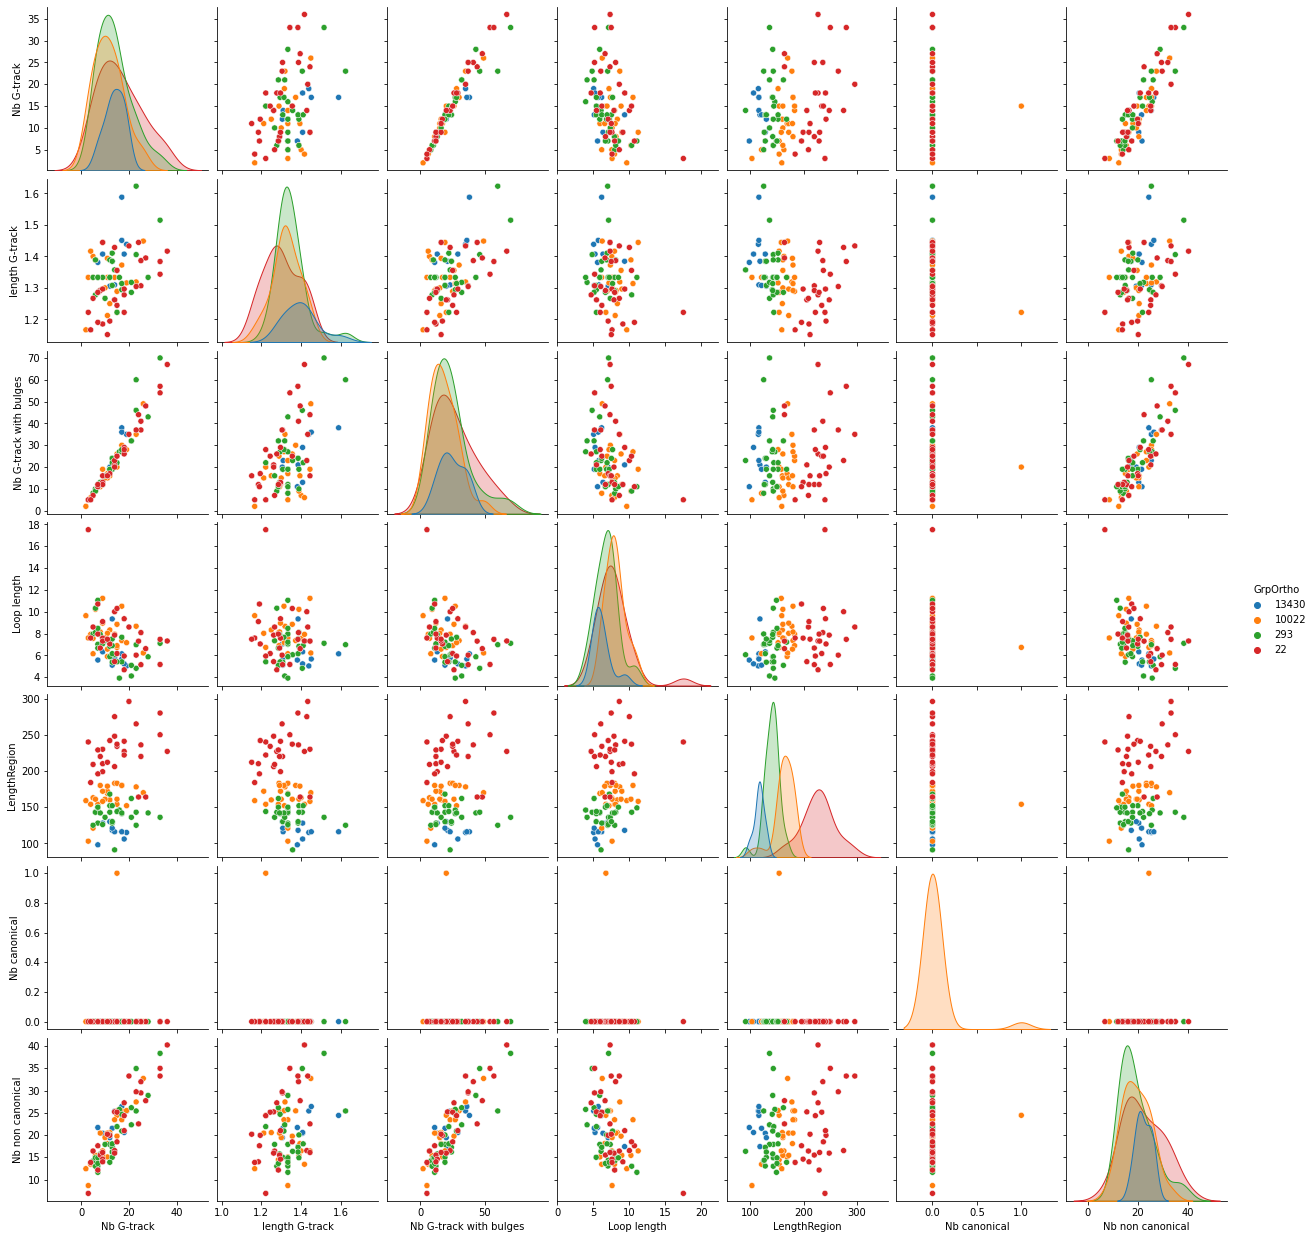

In [10]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(df[['Nb G-track', 'length G-track', 'Nb G-track with bulges', 'GrpOrtho',
            'Loop length', 'LengthRegion', 'Nb canonical', 'Nb non canonical']])
sns.pairplot(dfTmp, hue='GrpOrtho')
plt.show()

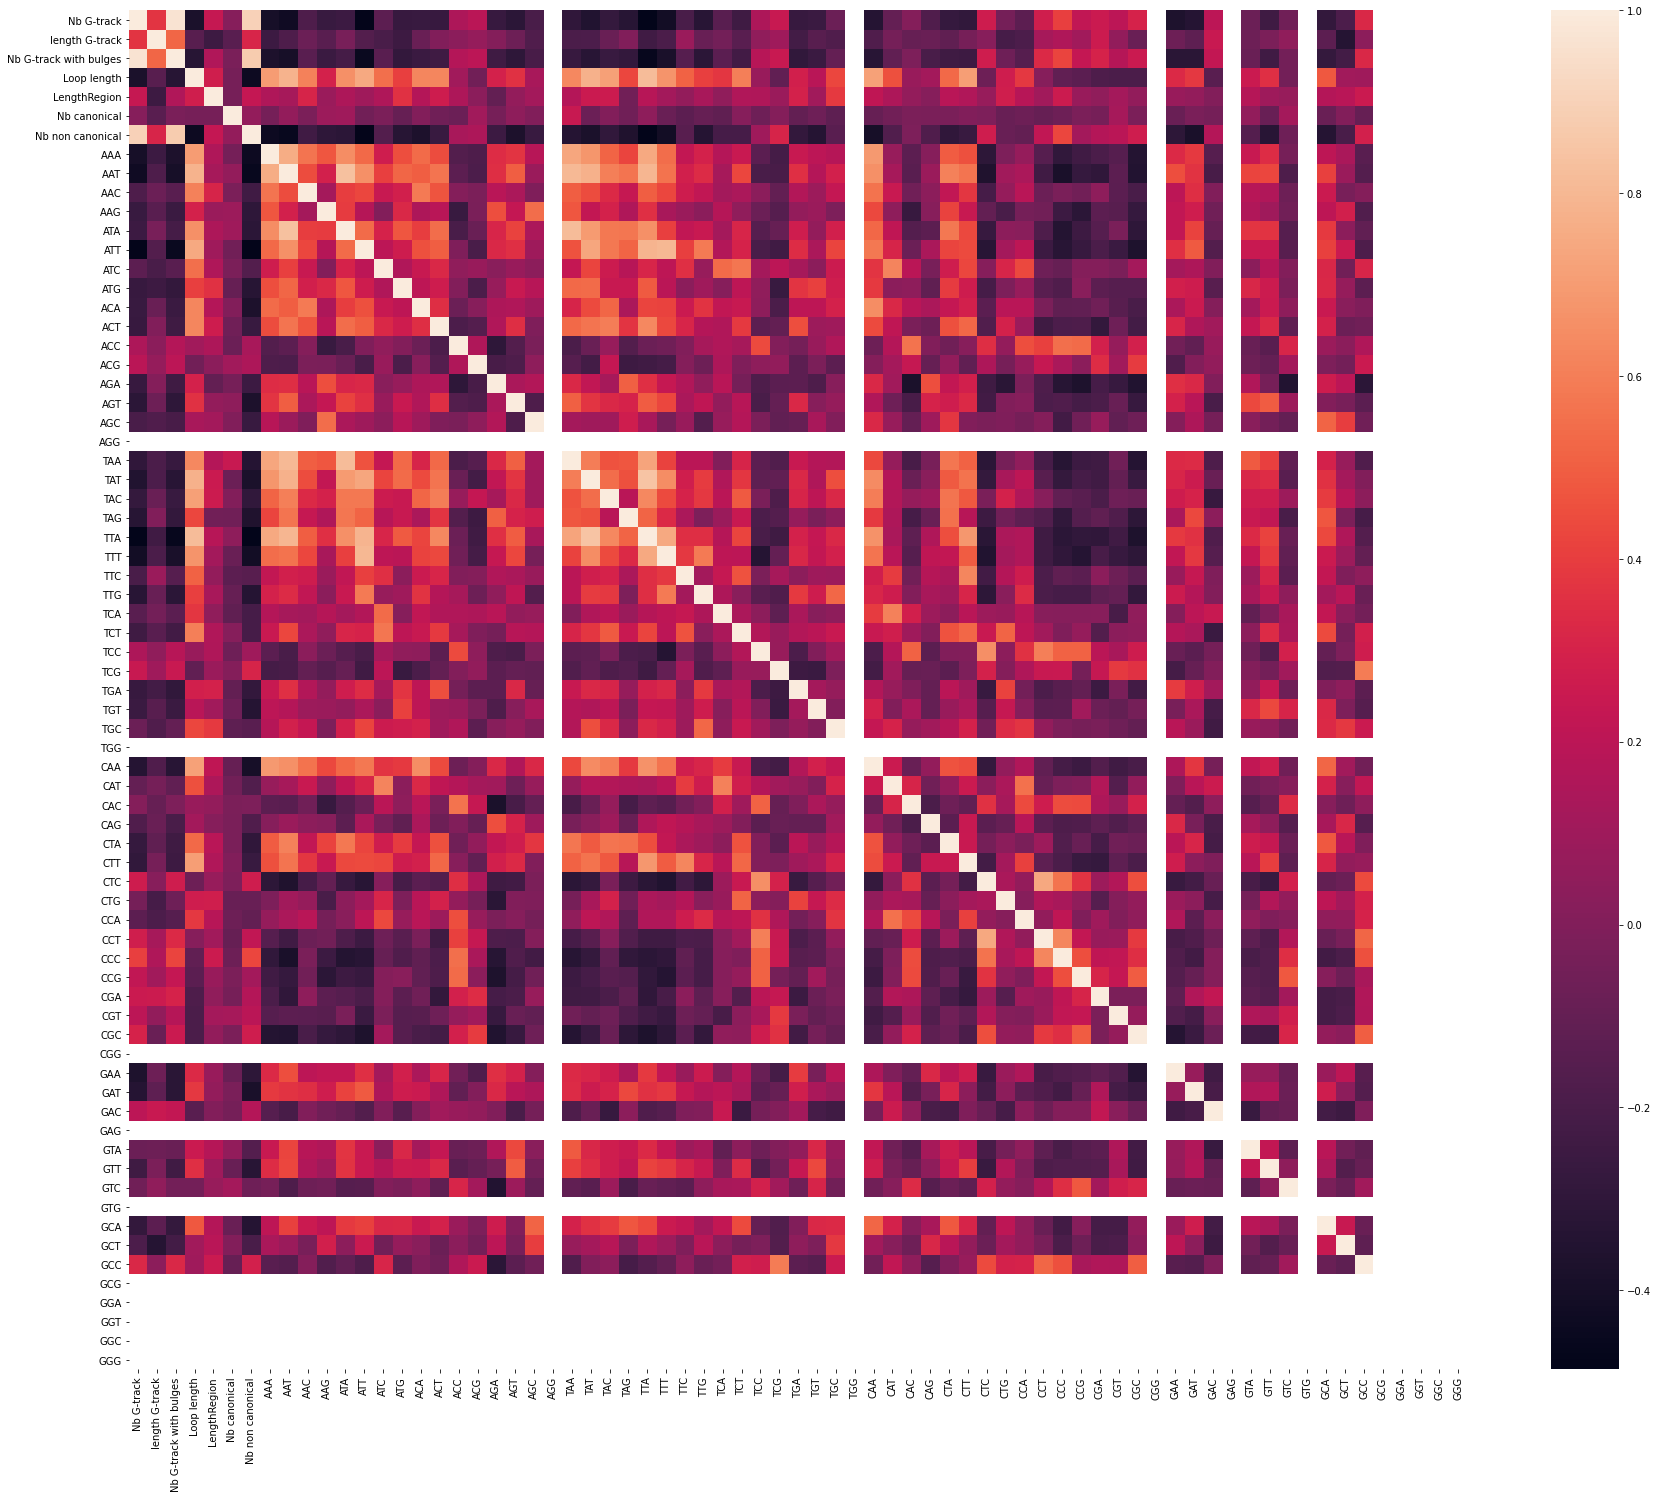

In [11]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.rcParams['figure.figsize'] = [30, 25]
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

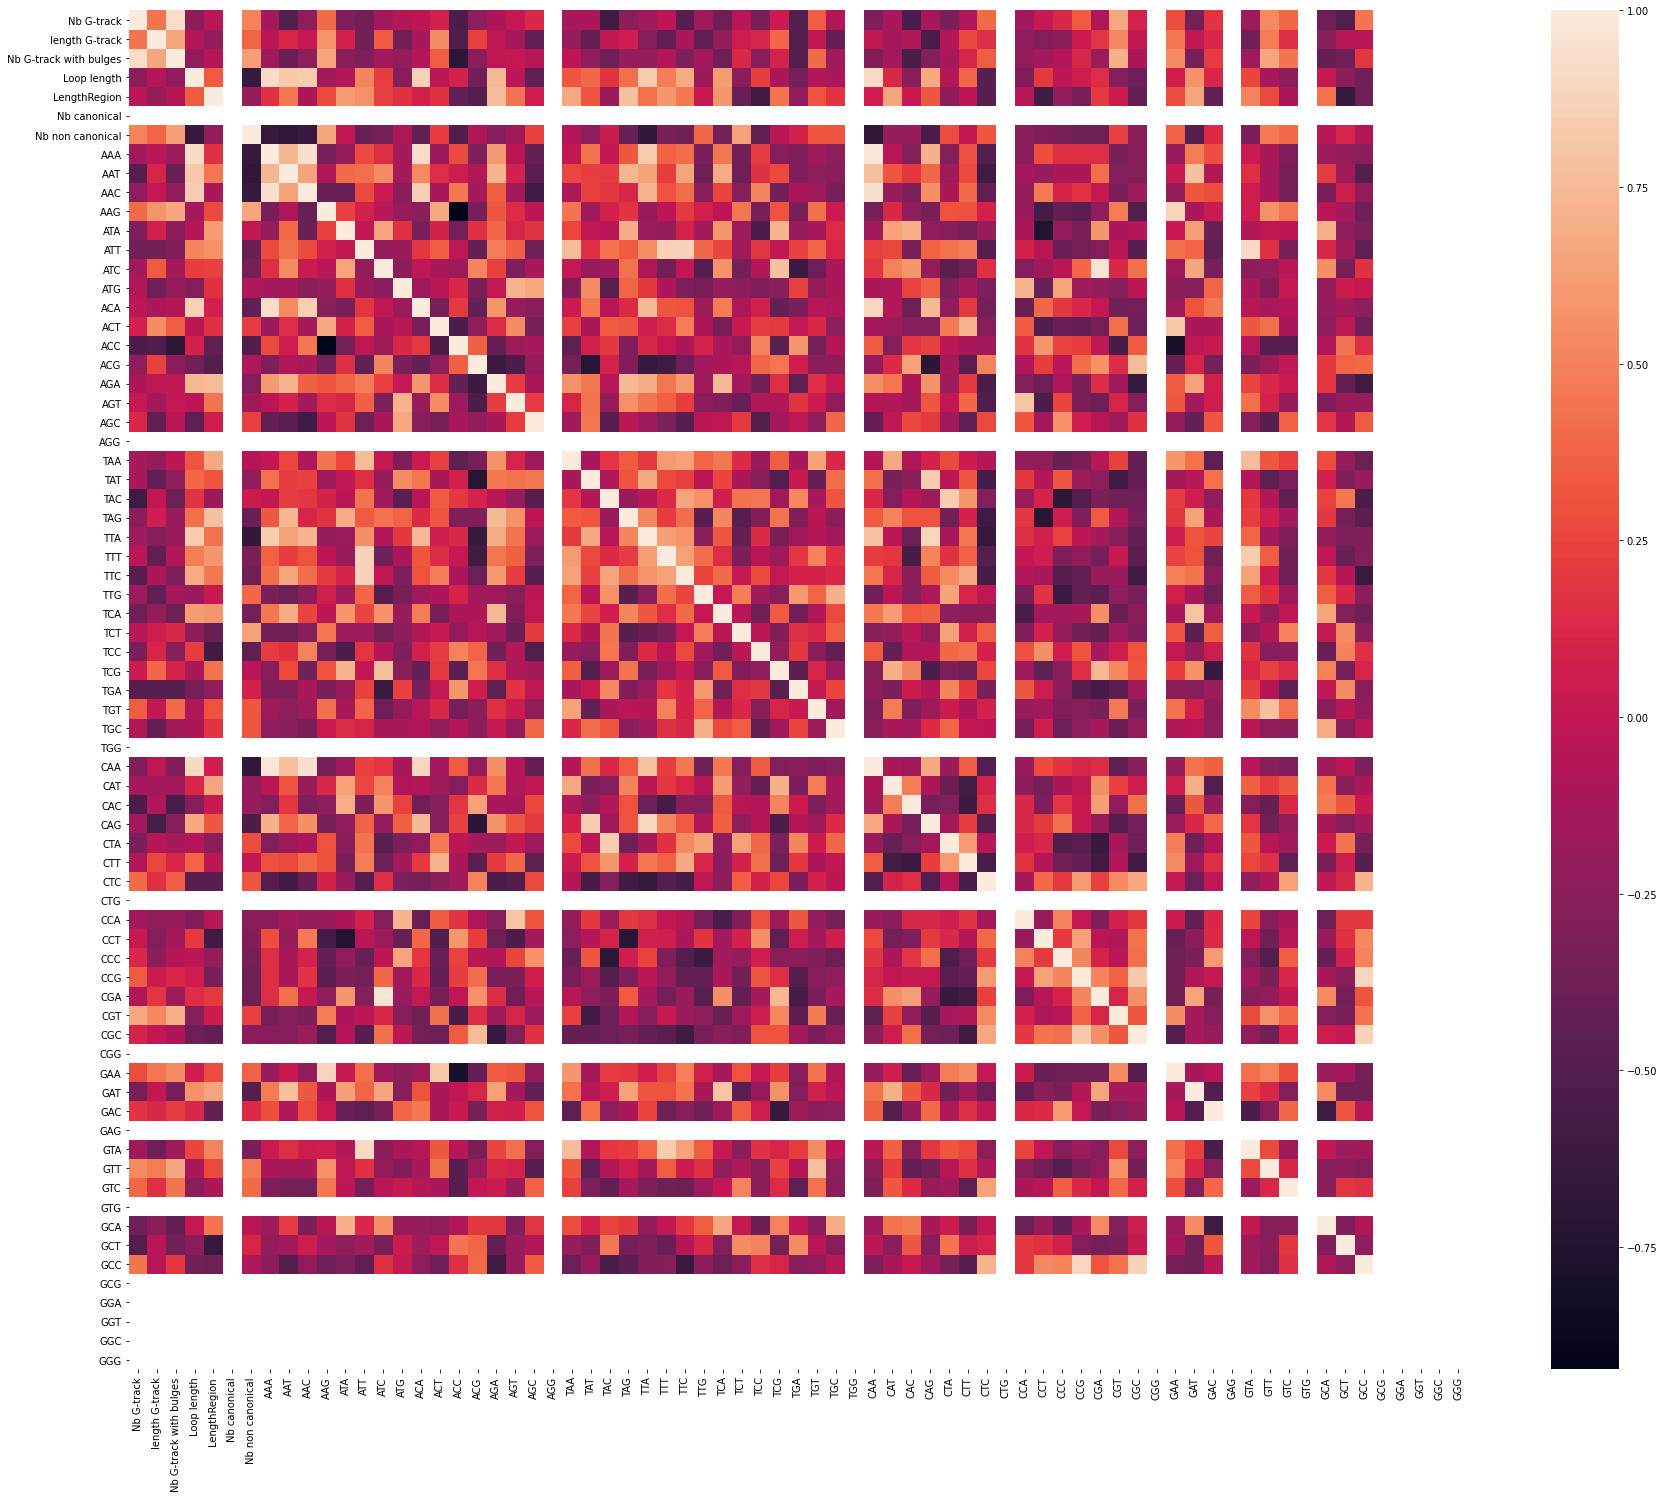

In [12]:
# calculate the correlation matrix
corr = df[df.GrpOrtho == '13430'].corr()

# plot the heatmap
plt.rcParams['figure.figsize'] = [30, 25]
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

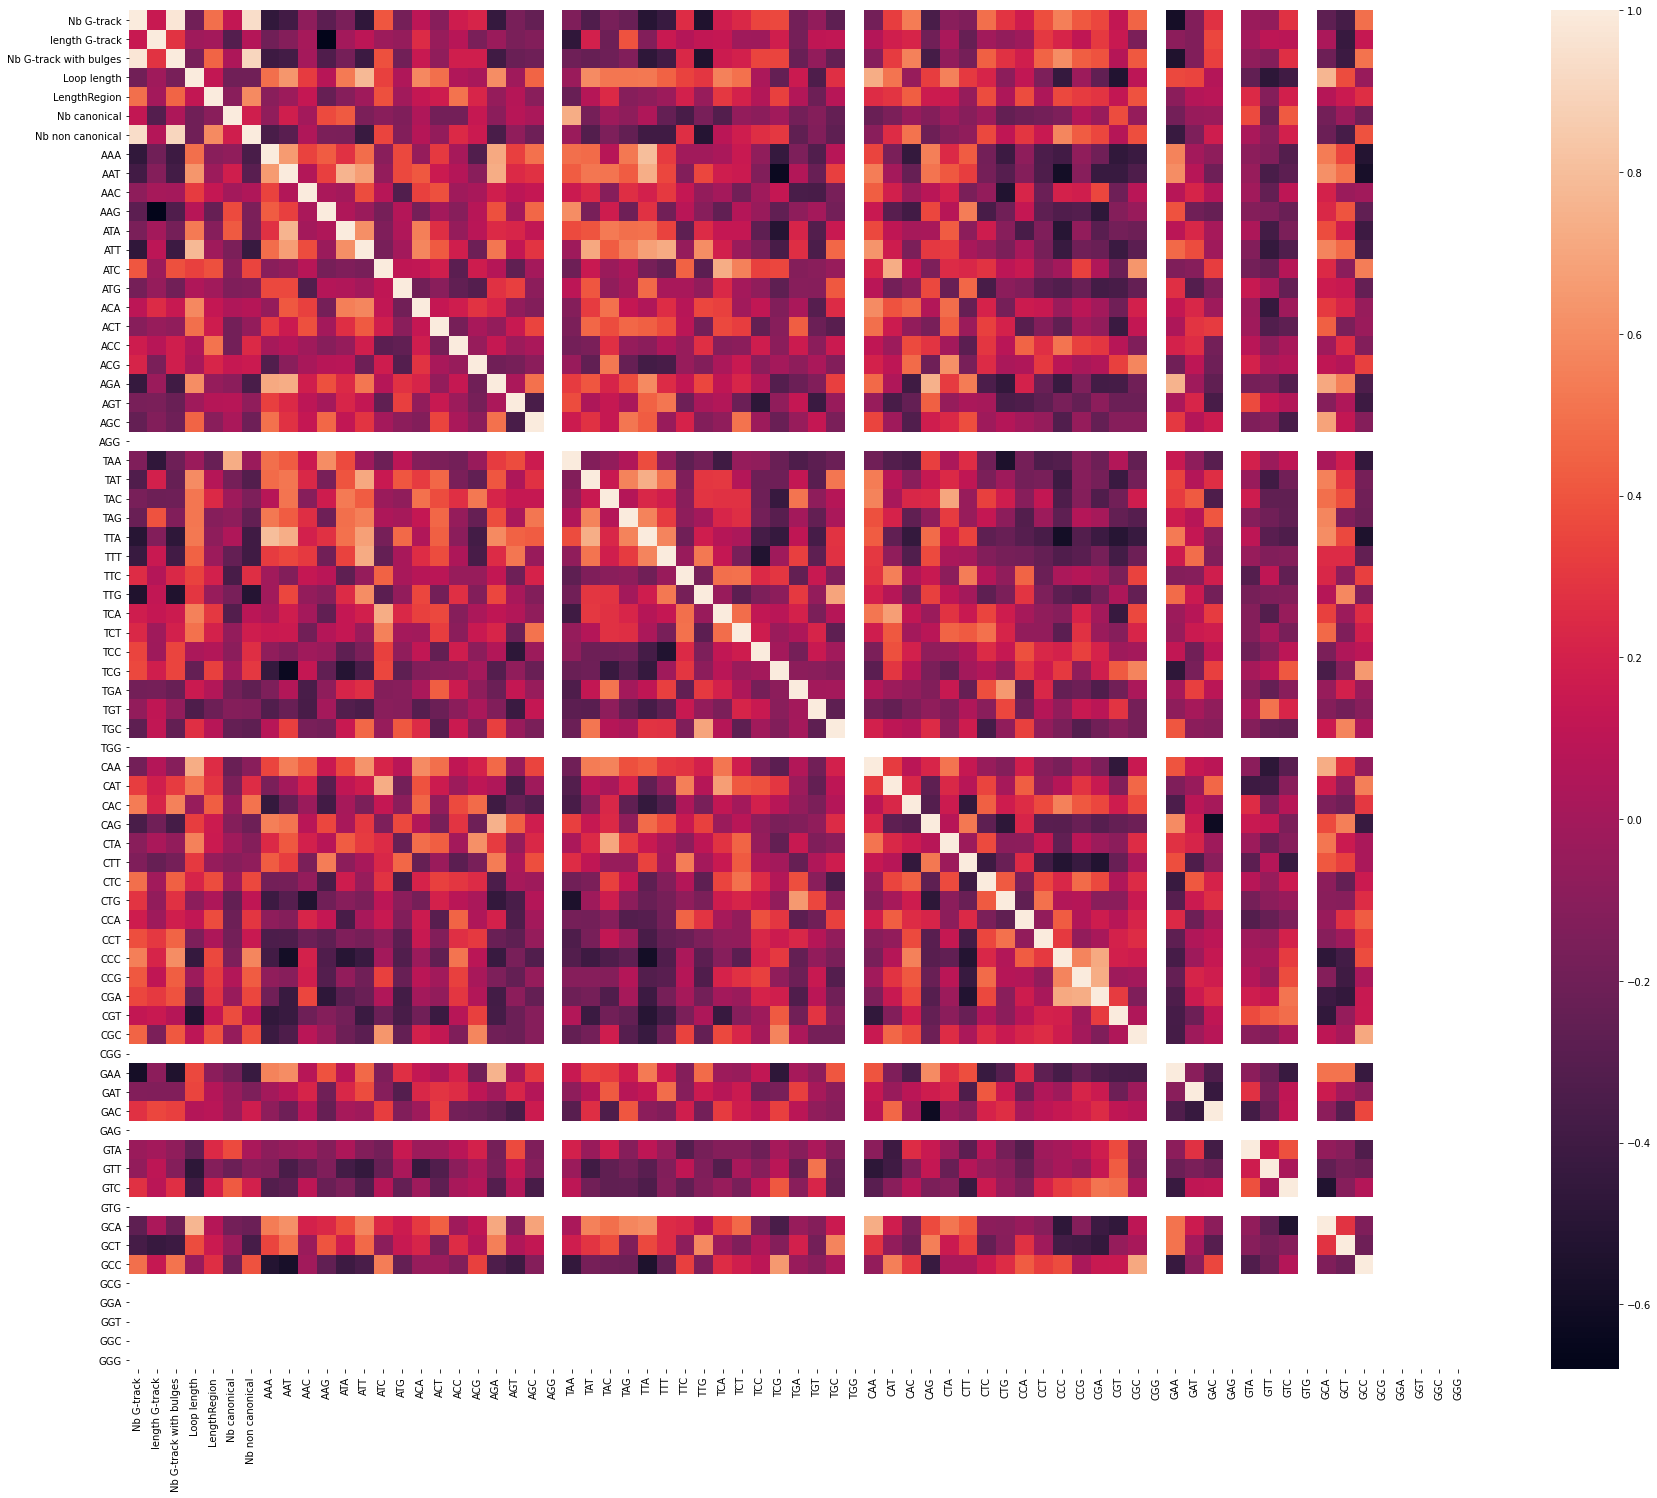

In [13]:
# calculate the correlation matrix
corr = df[df.GrpOrtho == '10022'].corr()

# plot the heatmap
plt.rcParams['figure.figsize'] = [30, 25]
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

Nb G-track


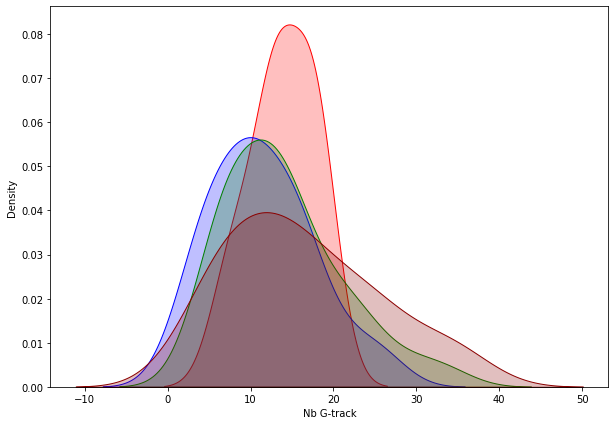

length G-track


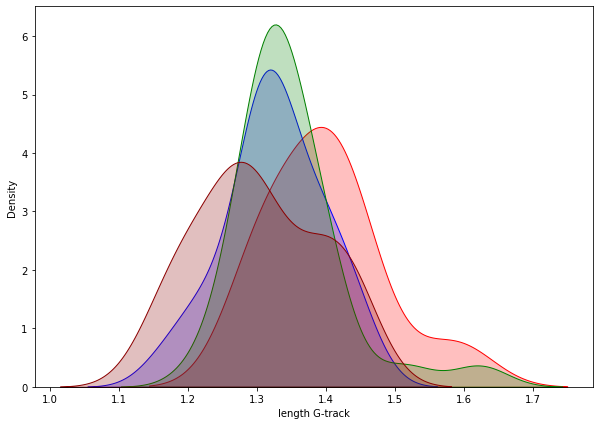

Nb G-track with bulges


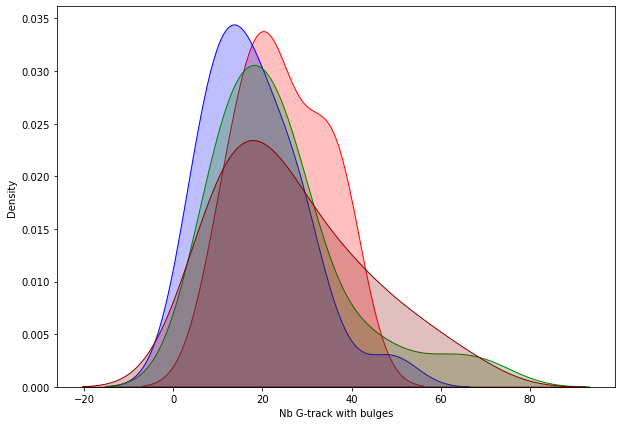

Loop length


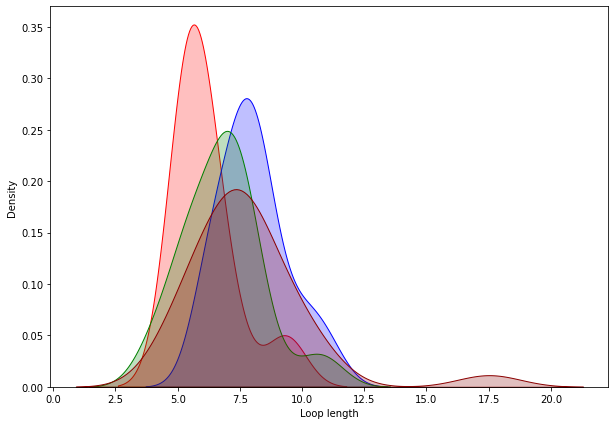

LengthRegion


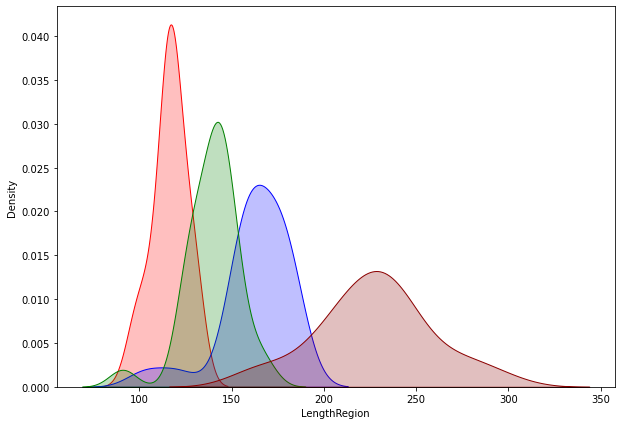

Nb canonical


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


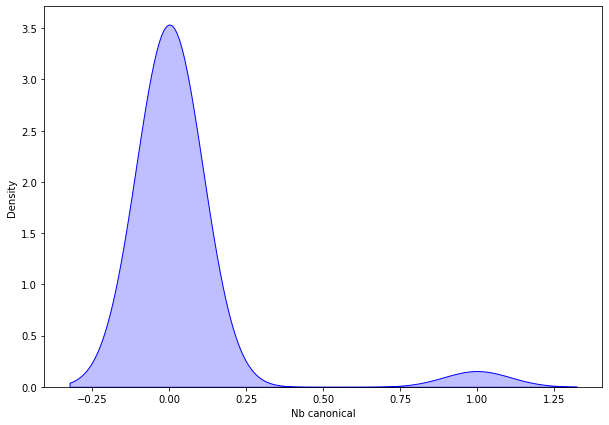

Nb non canonical


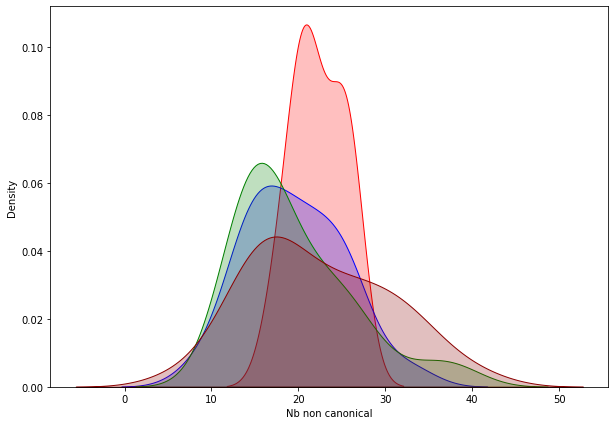

AAA


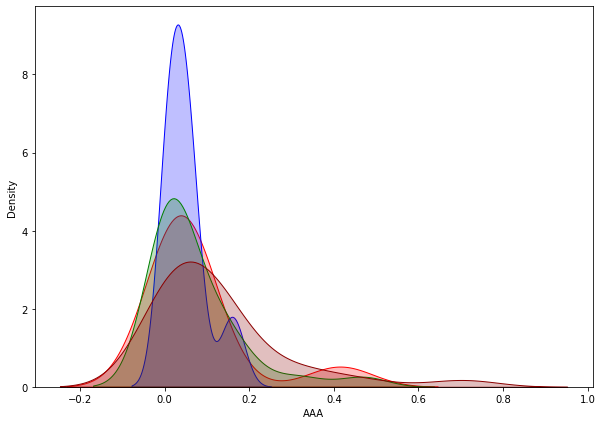

AAT


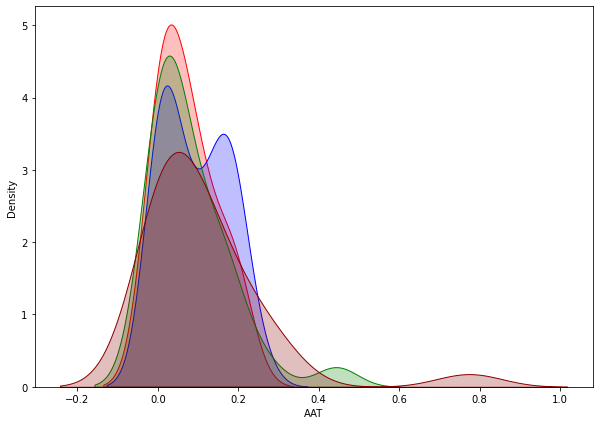

AAC


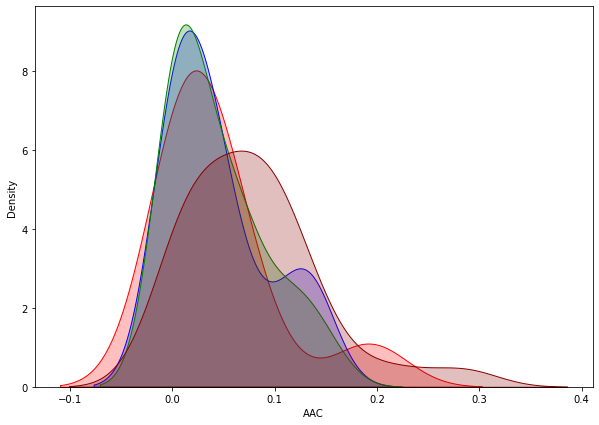

AAG


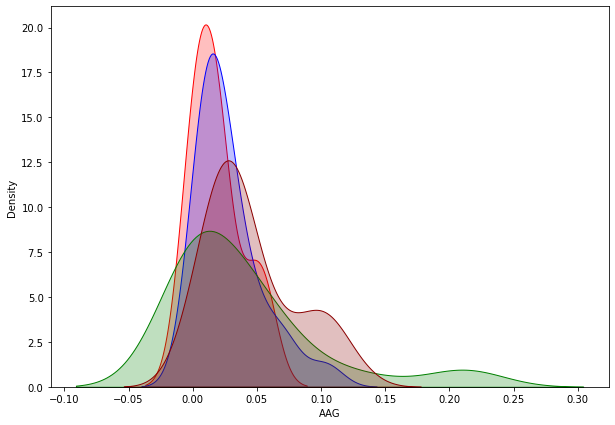

ATA


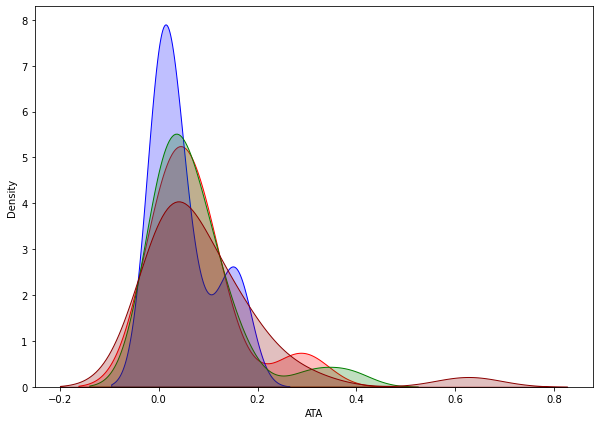

ATT


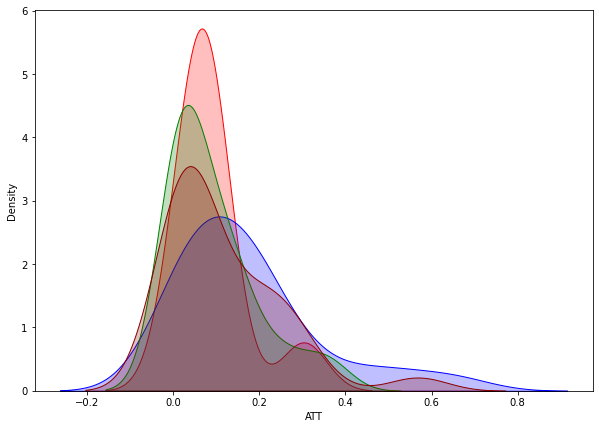

ATC


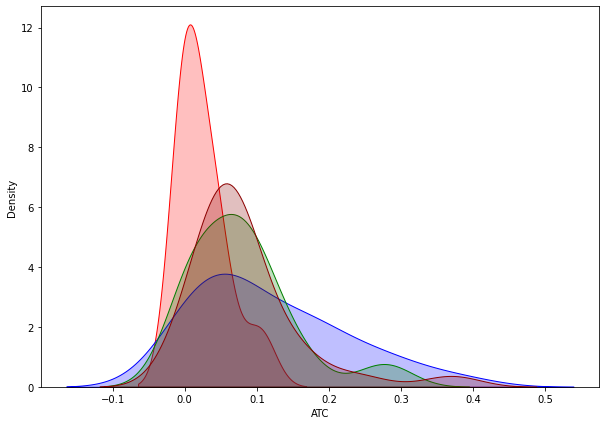

ATG


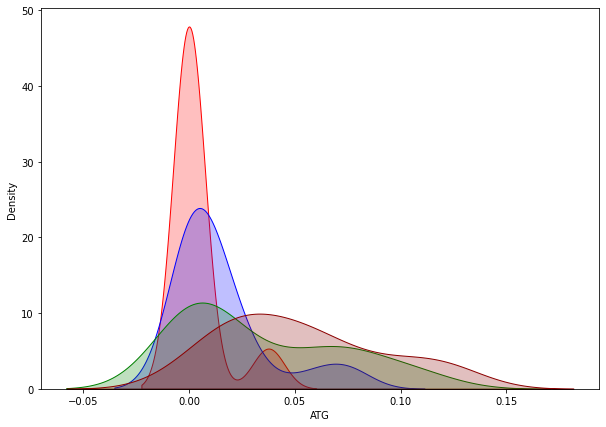

ACA


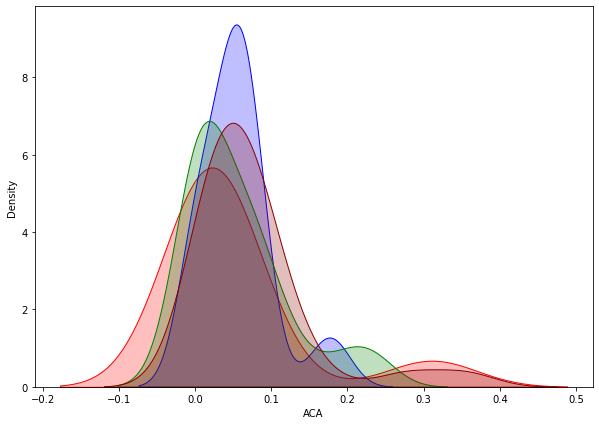

ACT


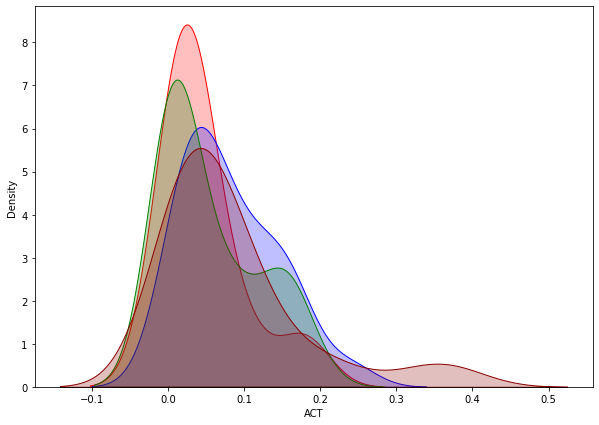

ACC


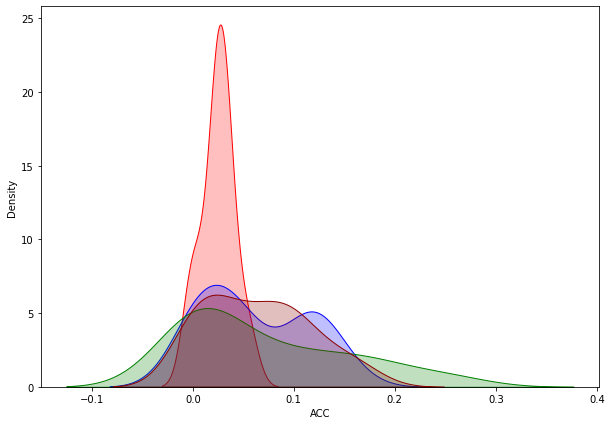

ACG


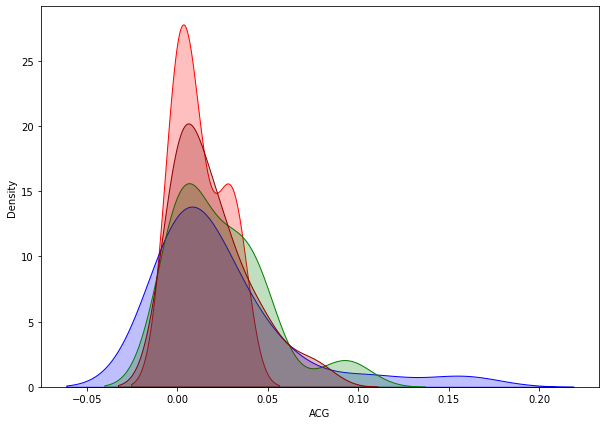

AGA


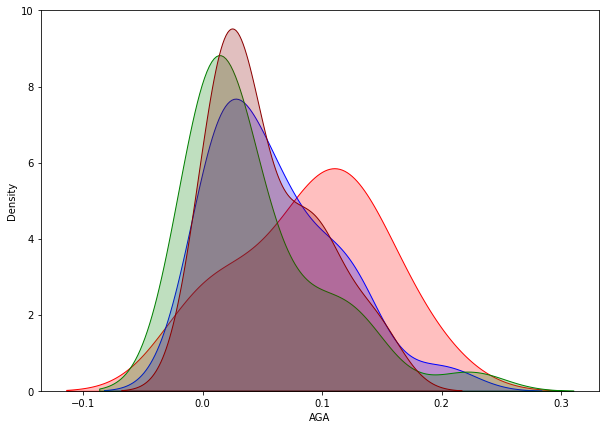

AGT


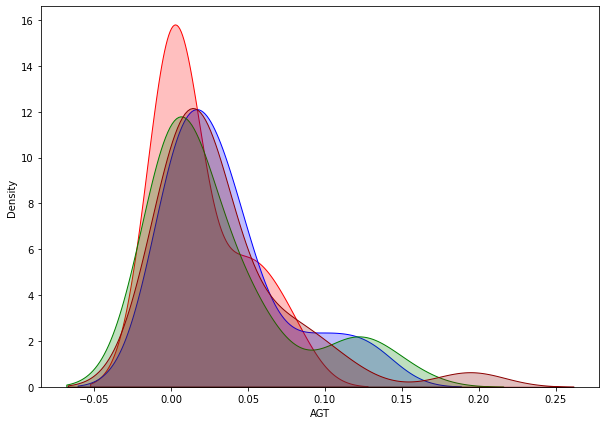

AGC


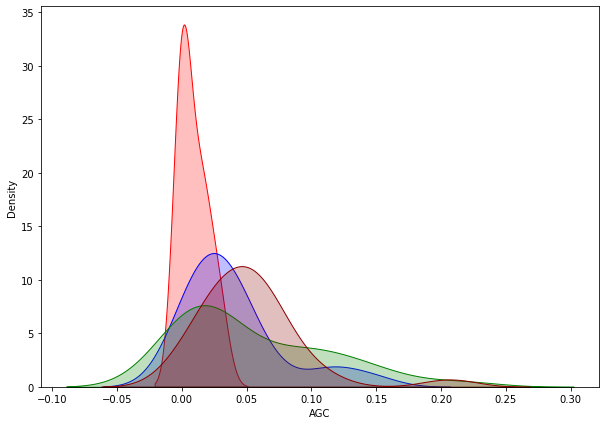

AGG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


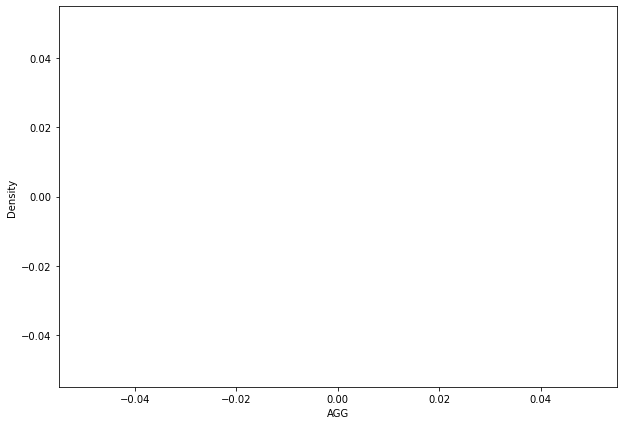

TAA


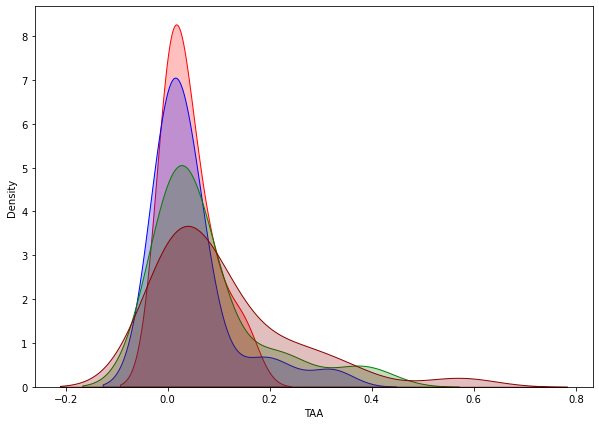

TAT


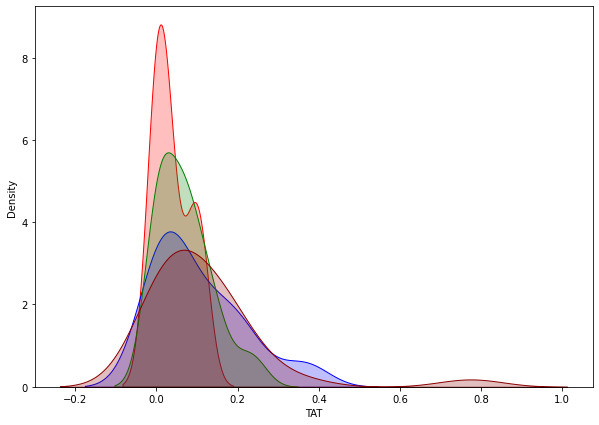

TAC


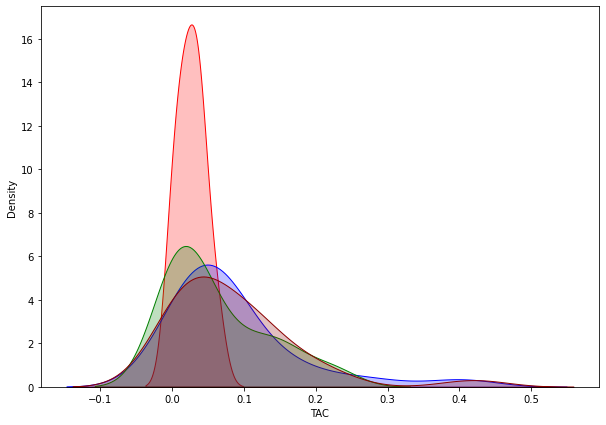

TAG


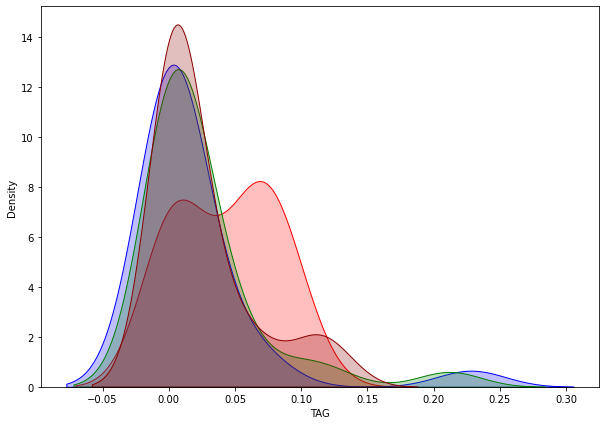

TTA


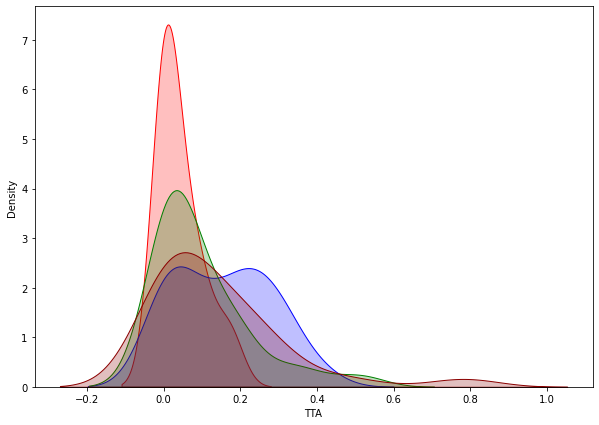

TTT


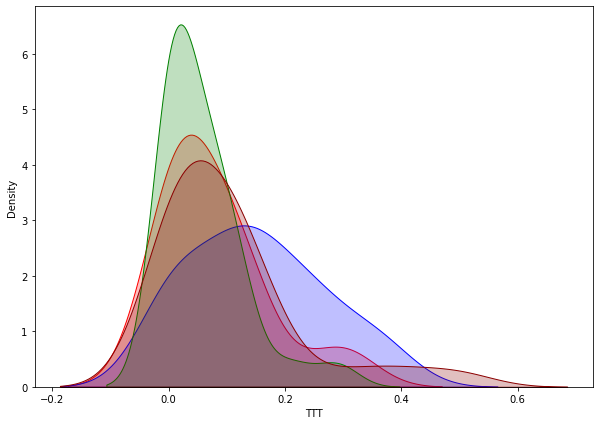

TTC


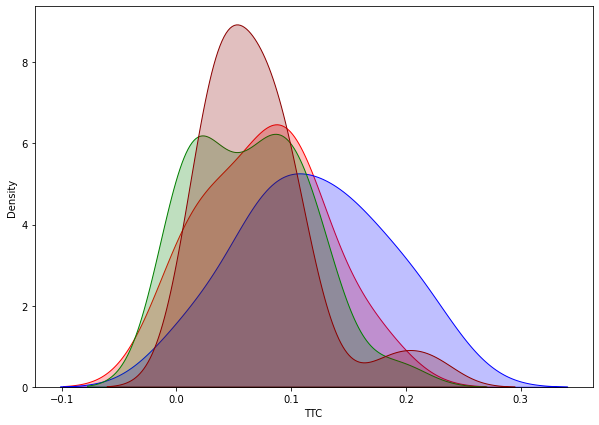

TTG


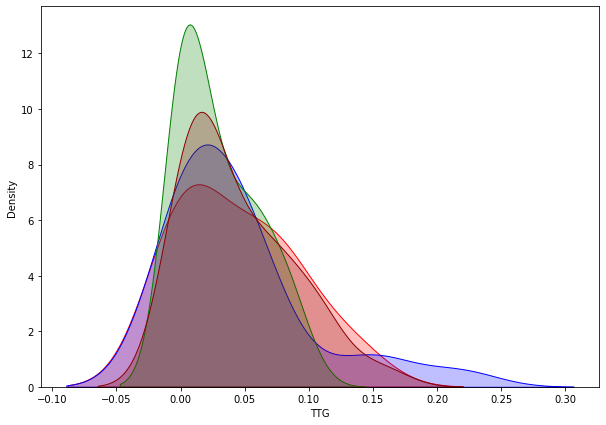

TCA


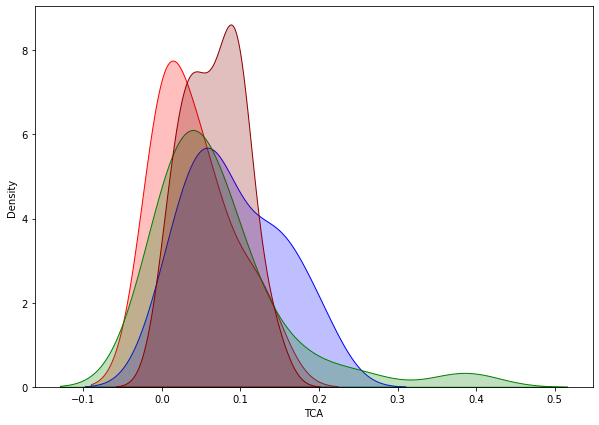

TCT


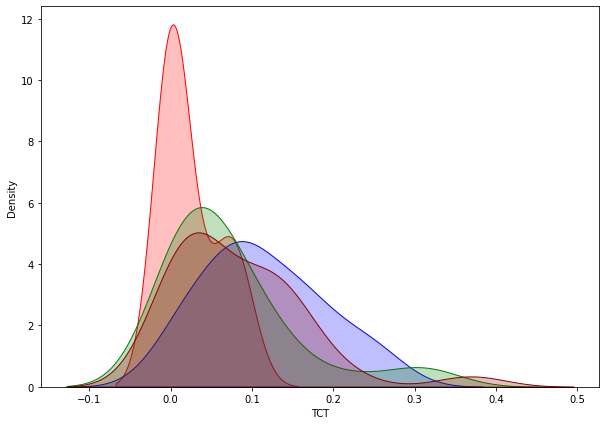

TCC


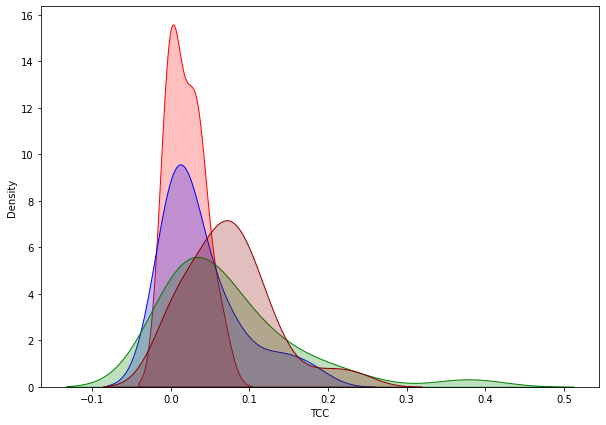

TCG


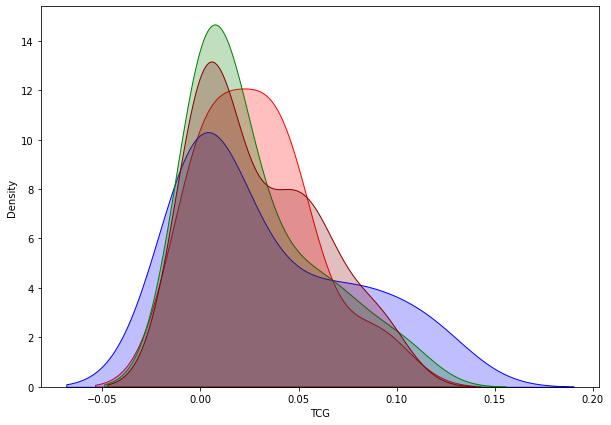

TGA


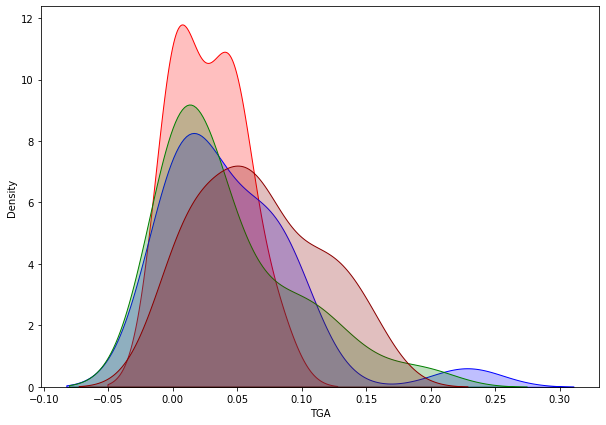

TGT


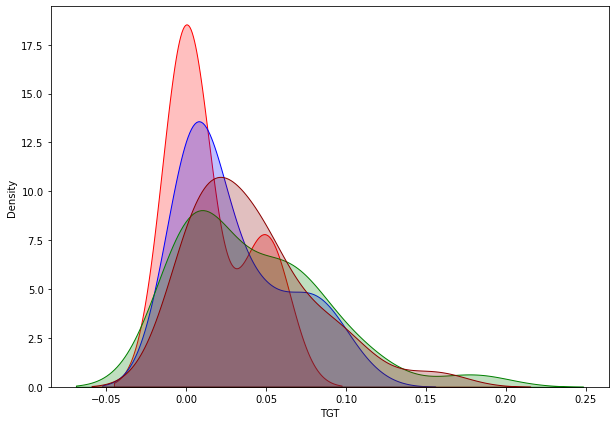

TGC


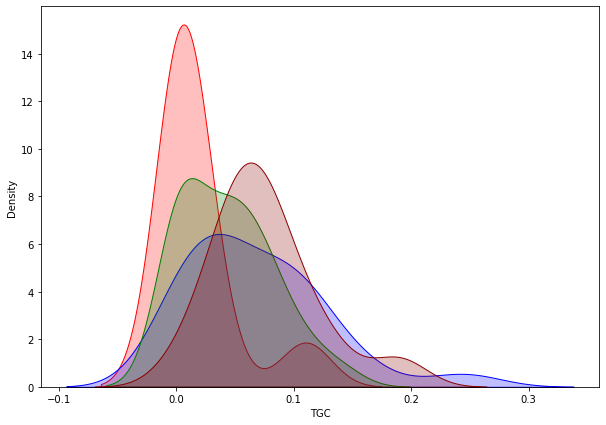

TGG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


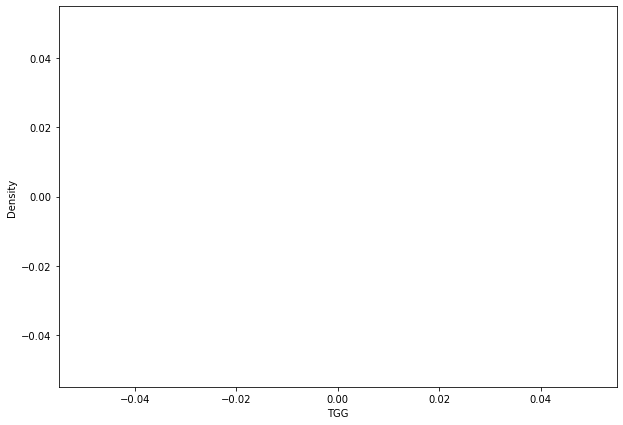

CAA


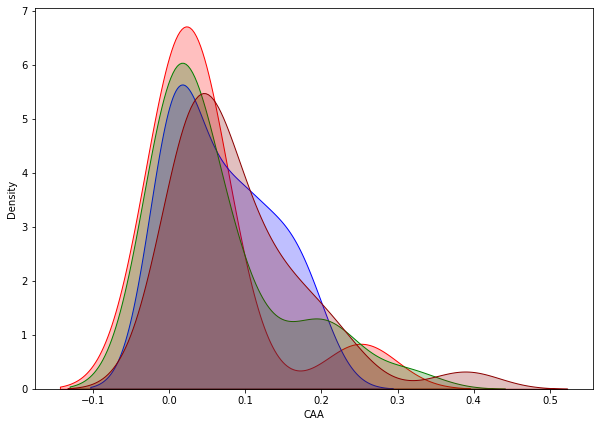

CAT


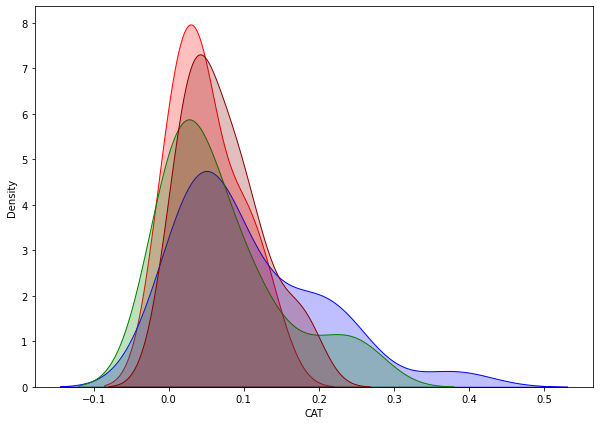

CAC


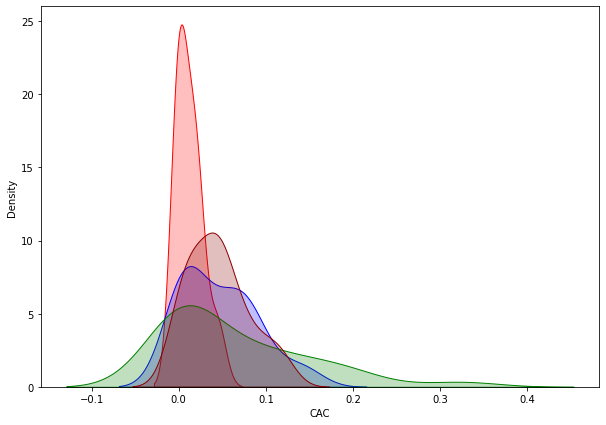

CAG


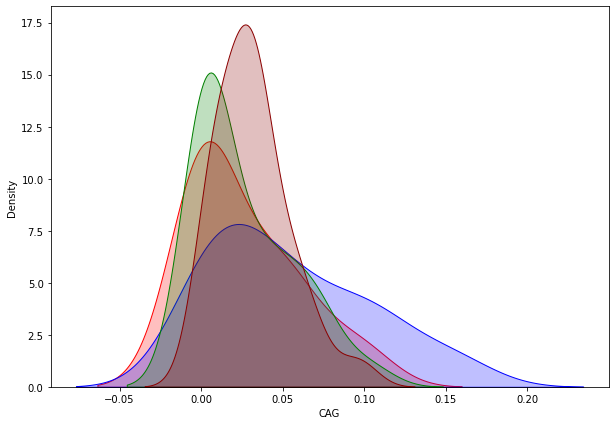

CTA


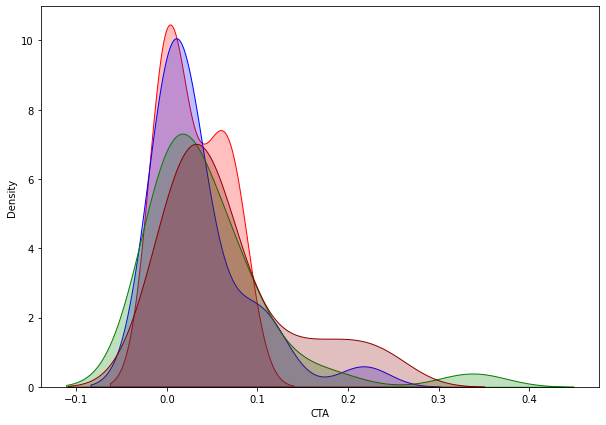

CTT


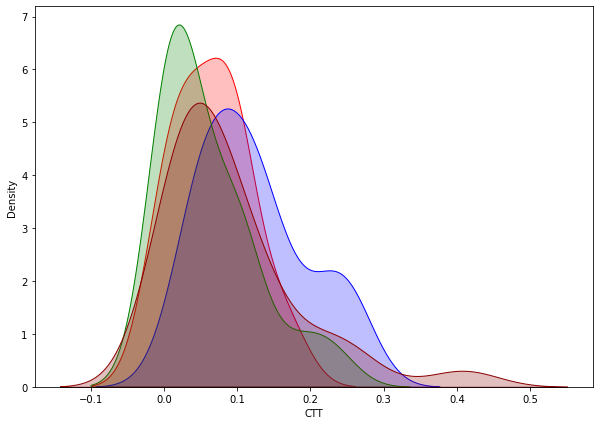

CTC


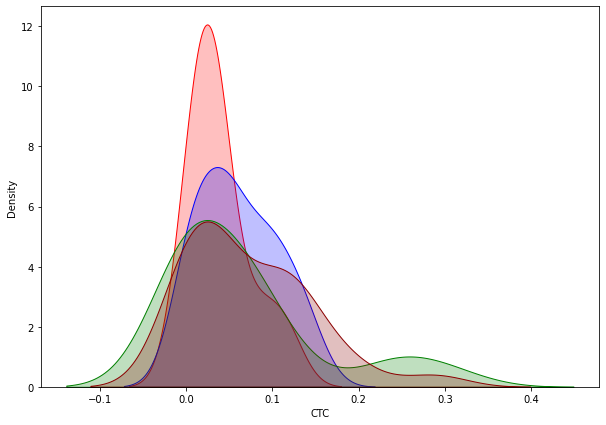

CTG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


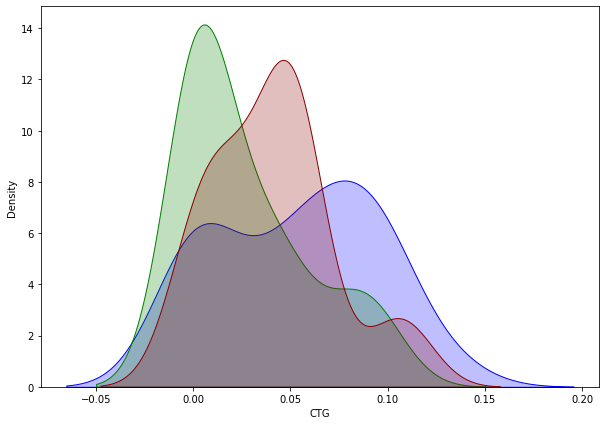

CCA


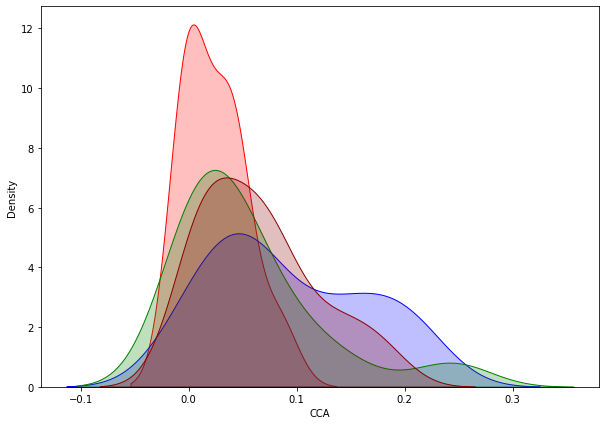

CCT


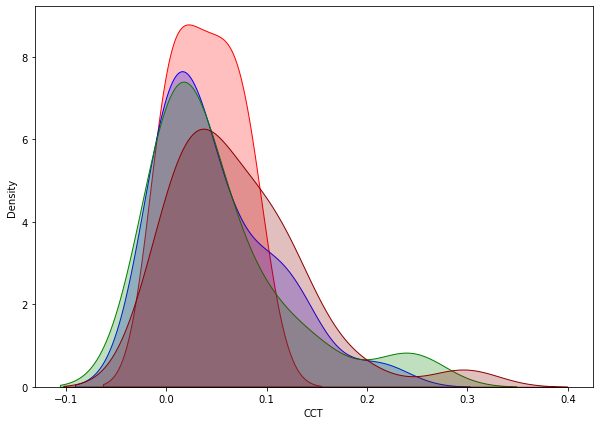

CCC


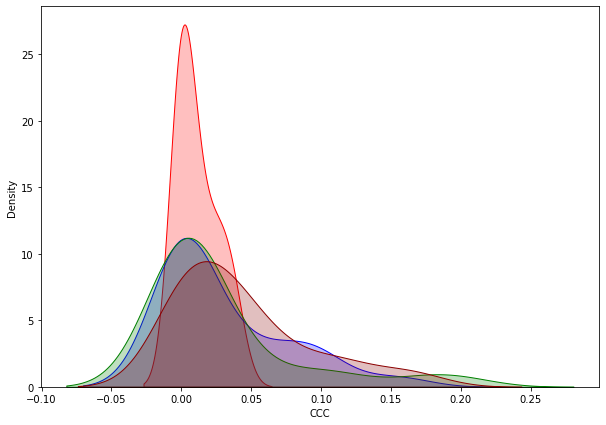

CCG


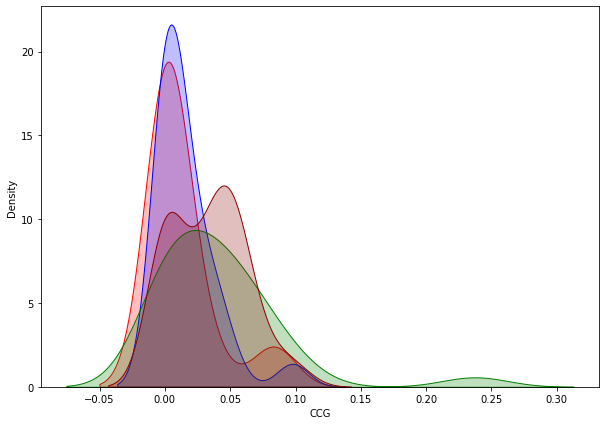

CGA


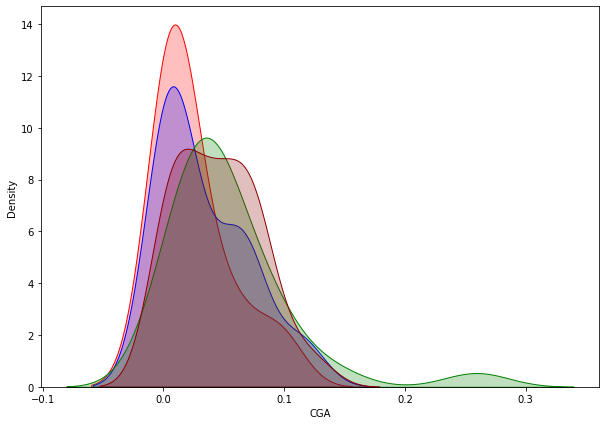

CGT


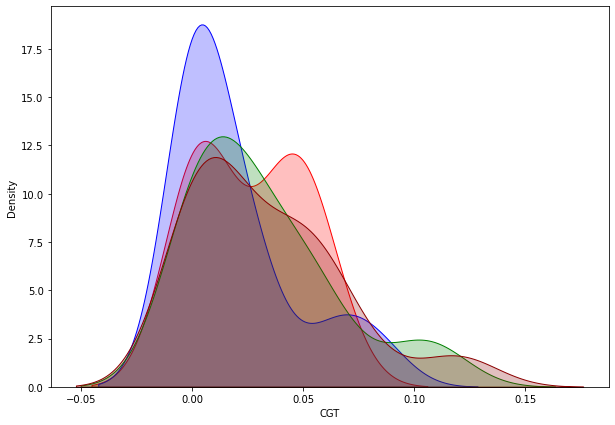

CGC


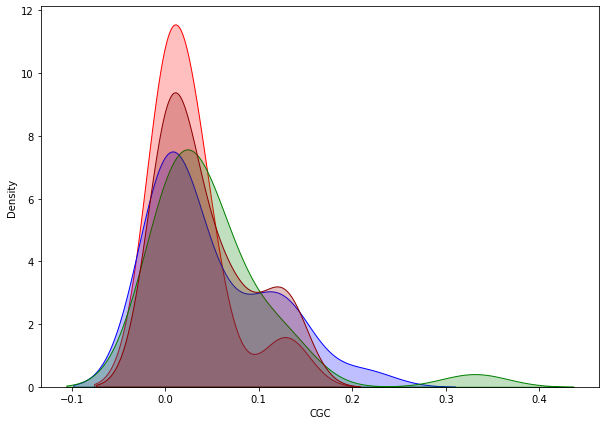

CGG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


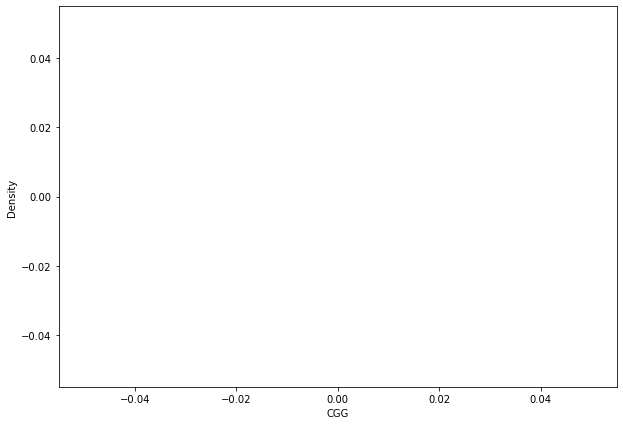

GAA


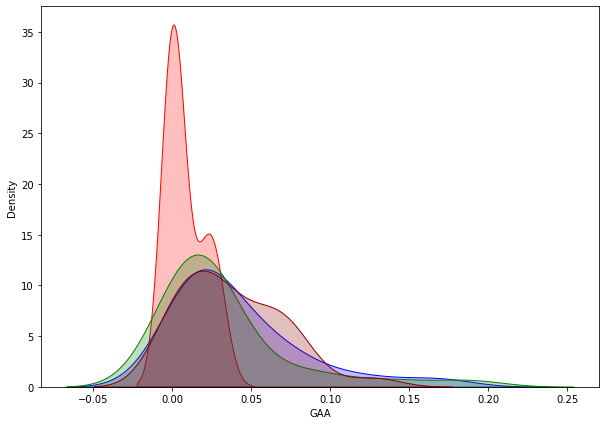

GAT


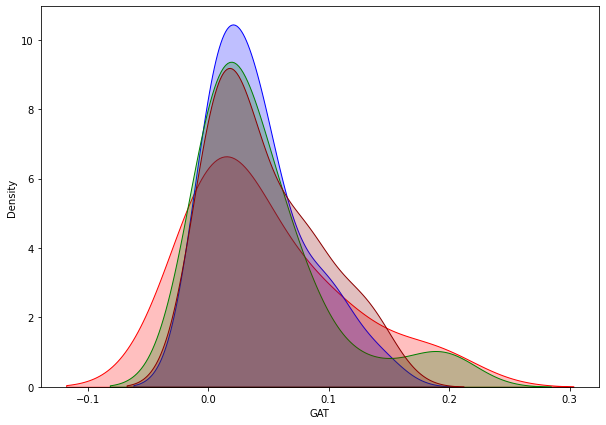

GAC


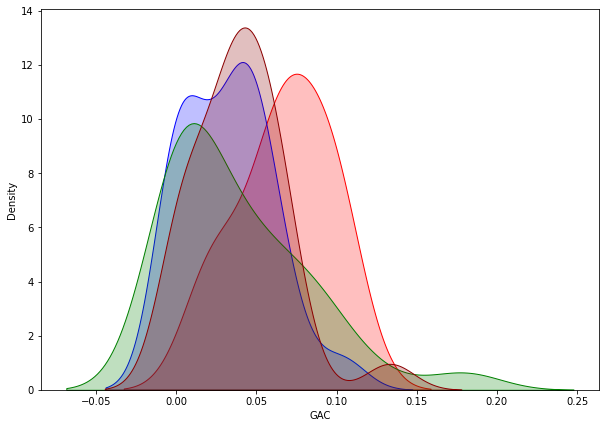

GAG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


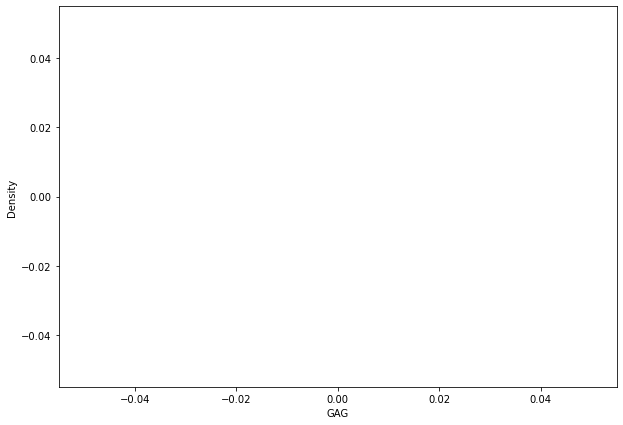

GTA


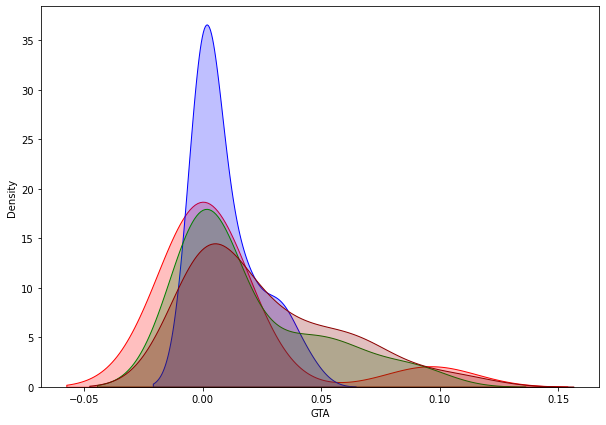

GTT


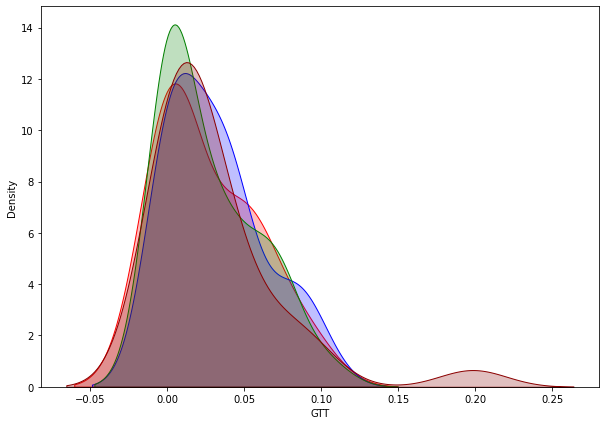

GTC


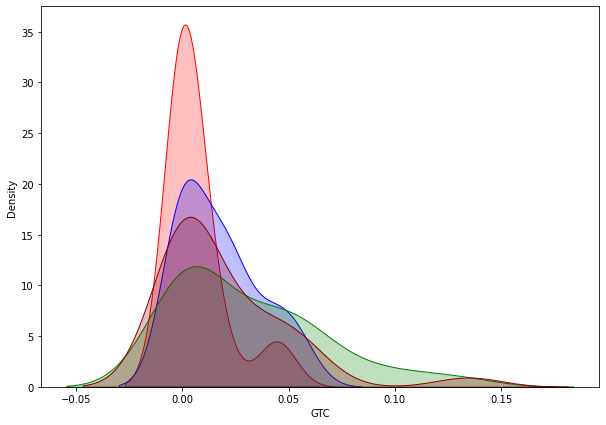

GTG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


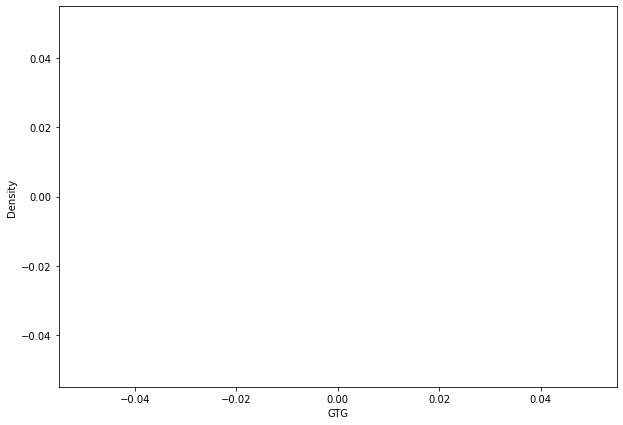

GCA


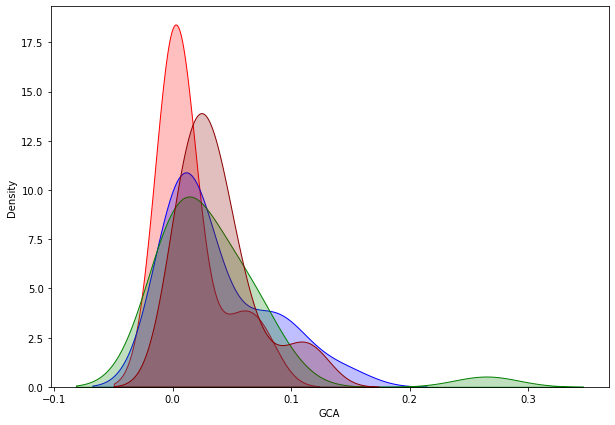

GCT


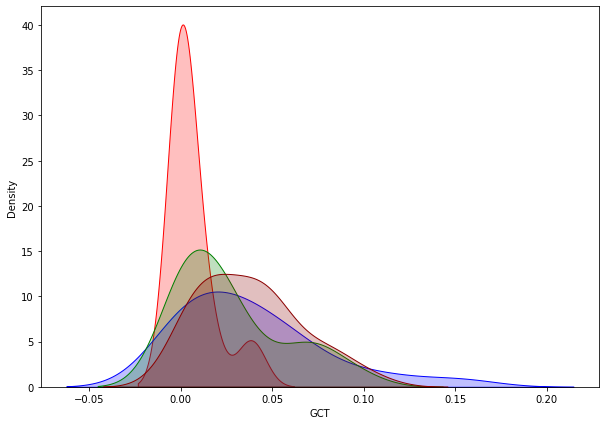

GCC


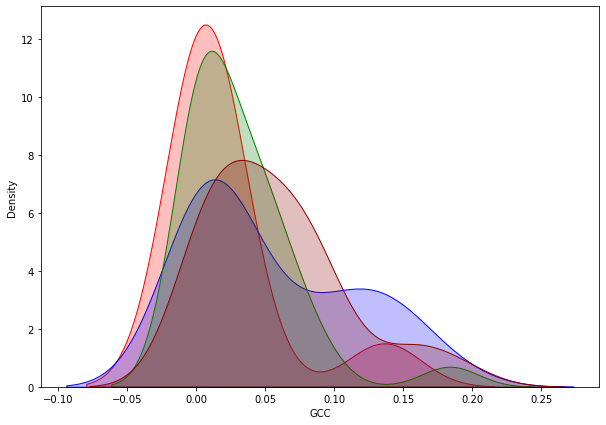

GCG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


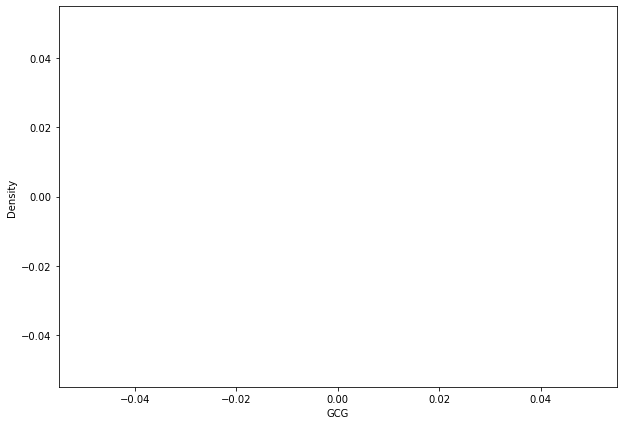

GGA


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


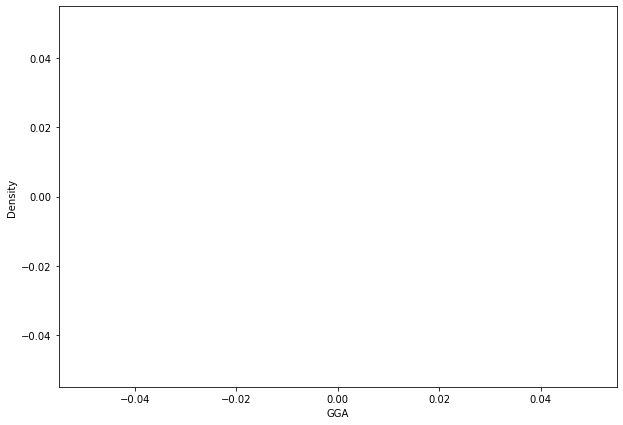

GGT


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


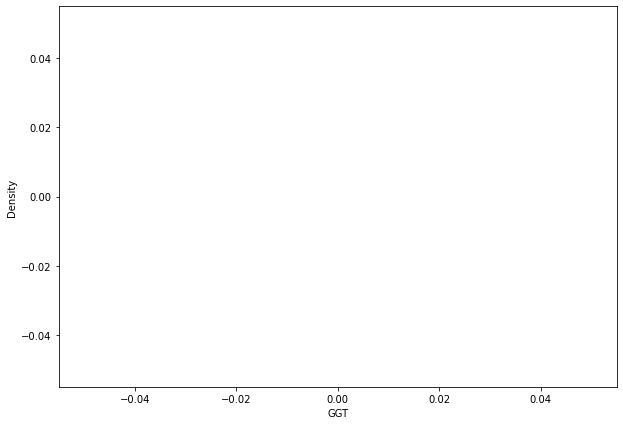

GGC


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


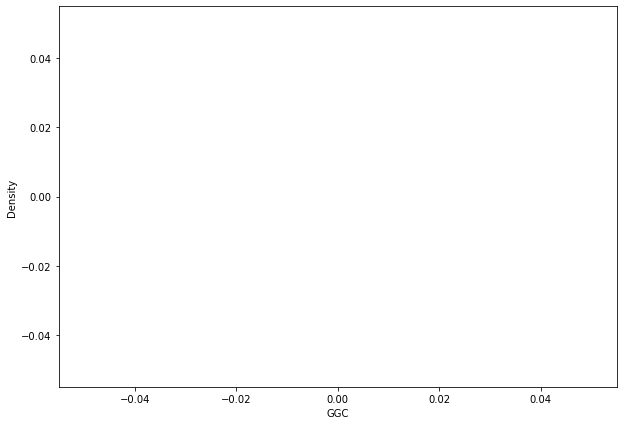

GGG


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


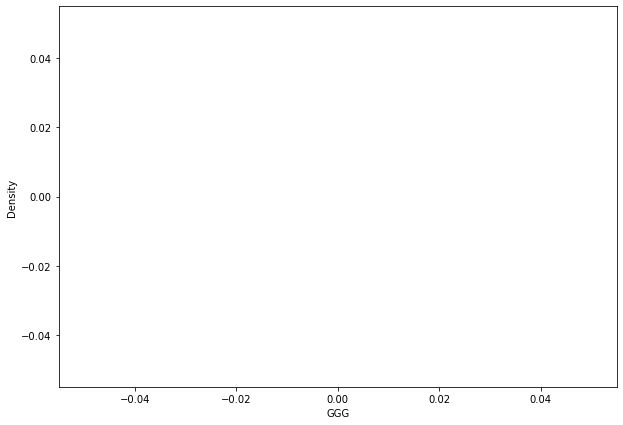

In [14]:
plt.rcParams['figure.figsize'] = [10, 7]
for col in df.columns:
    if col not in ['Gene', 'GrpOrtho']:
        print(col)
        fig = sns.kdeplot(df[df.GrpOrtho == '13430'][col], shade=True, color="r")
        fig = sns.kdeplot(df[df.GrpOrtho == '10022'][col], shade=True, color="b")
        fig = sns.kdeplot(df[df.GrpOrtho == '293'][col], shade=True, color="g")
        fig = sns.kdeplot(df[df.GrpOrtho == '22'][col], shade=True, color="darkred")
        plt.show()

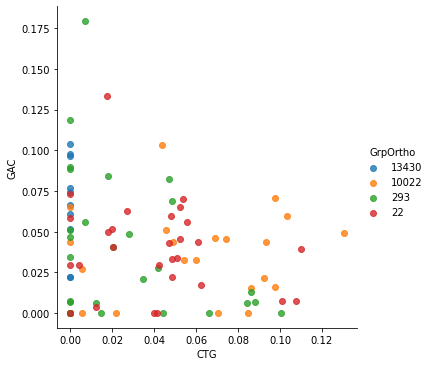

In [15]:
sns.lmplot(x="CTG", y="GAC", data=df, hue='GrpOrtho',fit_reg=False)

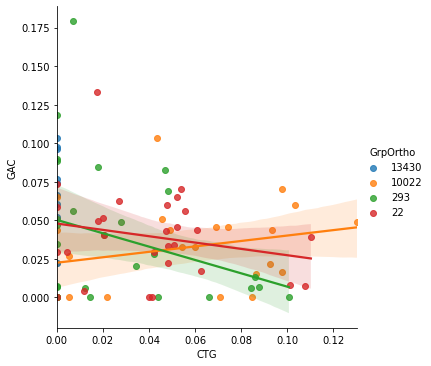

In [16]:
sns.lmplot(x="CTG", y="GAC", data=df, hue='GrpOrtho')

## Test AA

In [17]:
dicoAA = {'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                 
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'}


dfAA = pd.DataFrame()
dfAA = pd.concat([dfAA, df[['Nb G-track', 'length G-track', 'Gene',
                           'Nb G-track with bulges', 'Loop length', 'GrpOrtho',
                           'LengthRegion', 'Nb canonical', 'Nb non canonical']]])

for c in df.columns:
    if c in dicoAA:
        if dicoAA[c] in dfAA.columns:
            dfAA[dicoAA[c]] = dfAA[dicoAA[c]]+df[c]
        else:
            dfAA[dicoAA[c]] = df[c]
dfAA

Nb G-track  length G-track       Gene  Nb G-track with bulges  \
0           19        1.438596    AF_1740                      35   
1           13        1.384615   Msm_0850                      21   
2           17        1.588235   BAA29417                      38   
3           14        1.309524    MA_3306                      23   
4            7        1.380952  Hbut_1639                      11   
..         ...             ...        ...                     ...   
85          11        1.151515   BAA30953                      16   
86          20        1.433333    MA_0914                      35   
87          33        1.383838    AF_2363                      57   
88          18        1.222222  MXAN_6697                      28   
89          15        1.355556   Msm_1158                      25   

    Loop length GrpOrtho  LengthRegion  Nb canonical  Nb non canonical  \
0      5.036364    13430           115             0         25.407407   
1      9.342857    13430           118             0         17.407407   
2      6.147541    13430           116             0         24.407407   
3      5.758065    13430           116             0         25.352941   
4      5.576923    13430            98             0         21.692308   
..          ...      ...           ...           ...               ...   
85     7.489362       22           212             0         20.184100   
86     8.603261       22           296             0         33.257329   
87     7.475000       22           280             0         33.257329   
88     5.945736       22           222             0         24.347826   
89    10.303571       22           237             0         18.472222   

           K  ...         C    W         Q         H         P         E  \
0   0.066667  ...  0.059259  0.0  0.000000  0.044444  0.044444  0.000000   
1   0.414815  ...  0.000000  0.0  0.348148  0.037037  0.125926  0.000000   
2   0.111111  ...  0.000000  0.0  0.044444  0.000000  0.037037  0.029630   
3   0.029412  ...  0.110294  0.0  0.044118  0.007353  0.058824  0.007353   
4   0.038462  ...  0.000000  0.0  0.061538  0.023077  0.115385  0.000000   
..       ...  ...       ...  ...       ...       ...       ...       ...   
85  0.230126  ...  0.062762  0.0  0.129707  0.075314  0.200837  0.029289   
86  0.019544  ...  0.061889  0.0  0.052117  0.120521  0.345277  0.022801   
87  0.078176  ...  0.120521  0.0  0.146580  0.123779  0.211726  0.013029   
88  0.017391  ...  0.191304  0.0  0.039130  0.117391  0.239130  0.000000   
89  0.184028  ...  0.215278  0.0  0.267361  0.232639  0.076389  0.045139   

           D         V         A    G  
0   0.103704  0.088889  0.022222  0.0  
1   0.214815  0.007407  0.000000  0.0  
2   0.096296  0.051852  0.000000  0.0  
3   0.066176  0.000000  0.073529  0.0  
4   0.076923  0.000000  0.038462  0.0  
..       ...       ...       ...  ...  
85  0.029289  0.025105  0.066946  0.0  
86  0.061889  0.156352  0.065147  0.0  
87  0.068404  0.061889  0.172638  0.0  
88  0.047826  0.069565  0.204348  0.0  
89  0.104167  0.083333  0.125000  0.0  

[90 rows x 30 columns]

Nb G-track


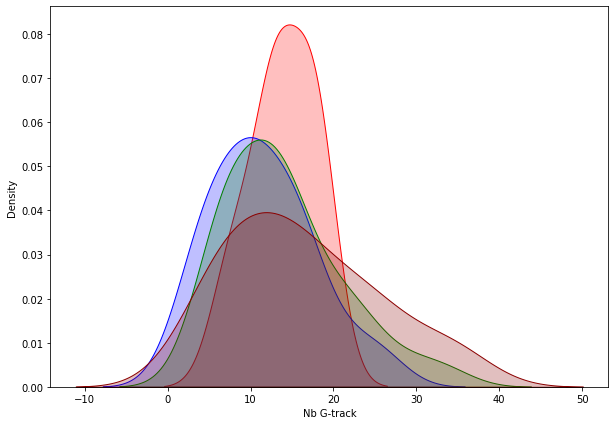

length G-track


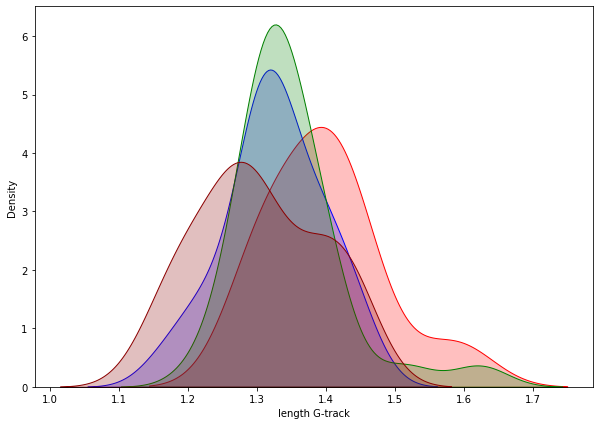

Nb G-track with bulges


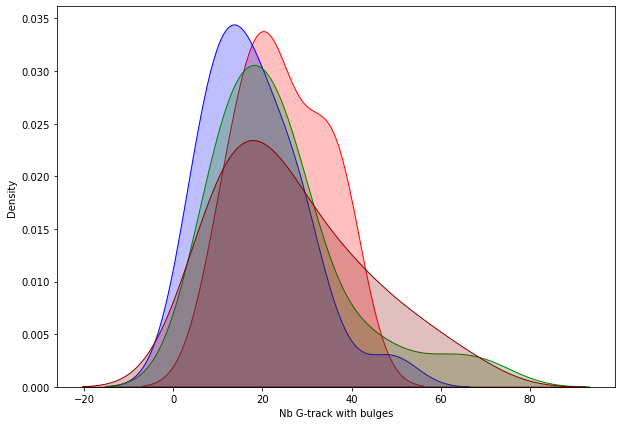

Loop length


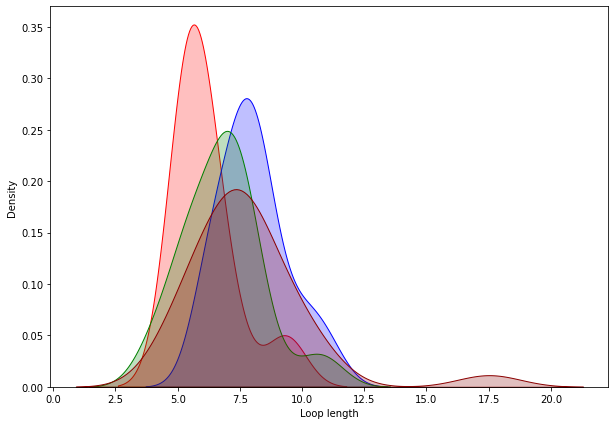

LengthRegion


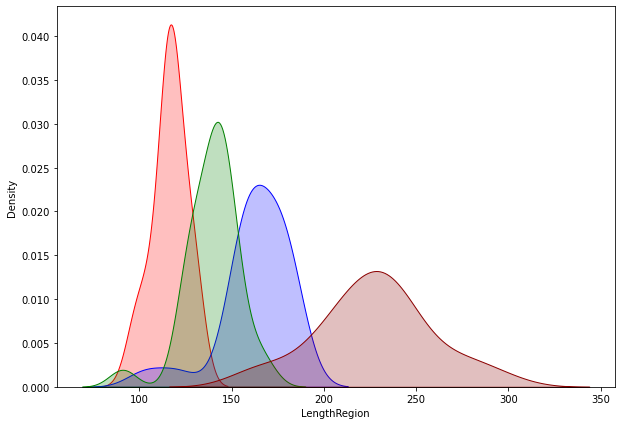

Nb canonical


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


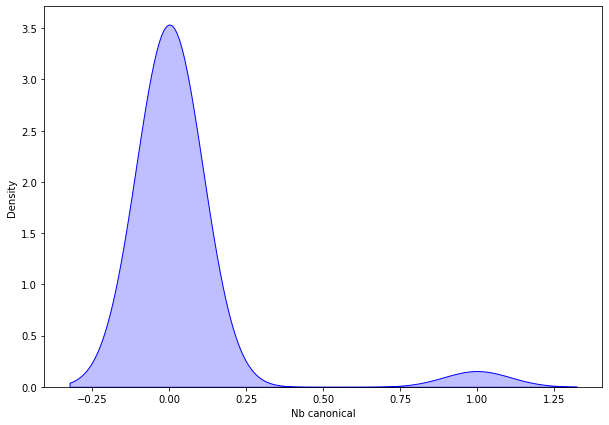

Nb non canonical


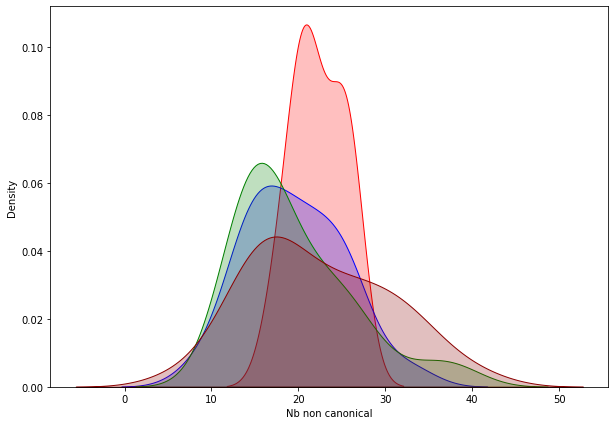

K


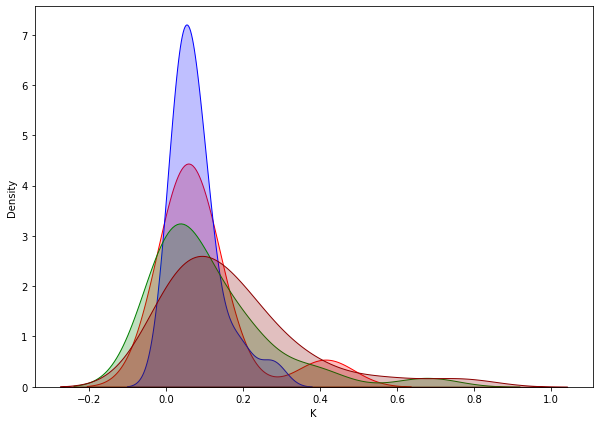

N


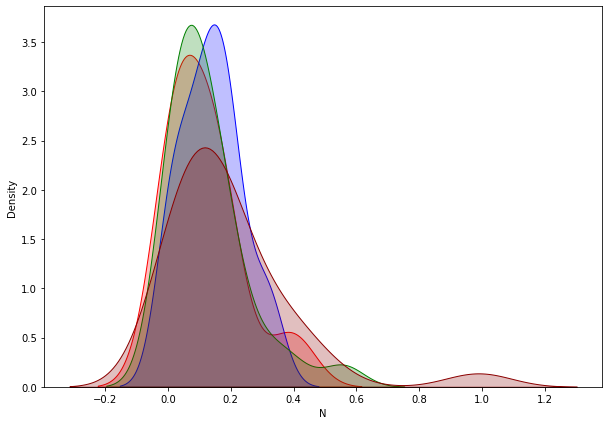

I


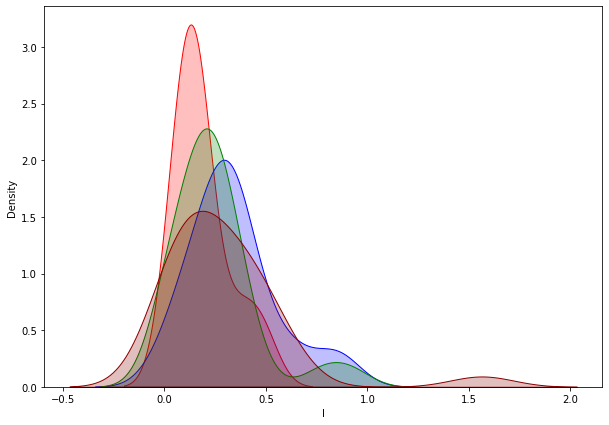

M


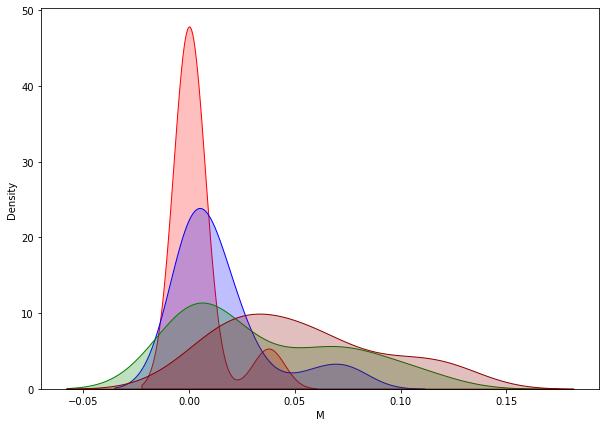

T


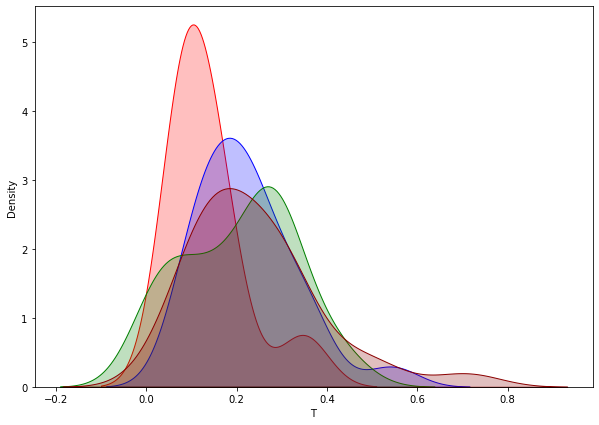

R


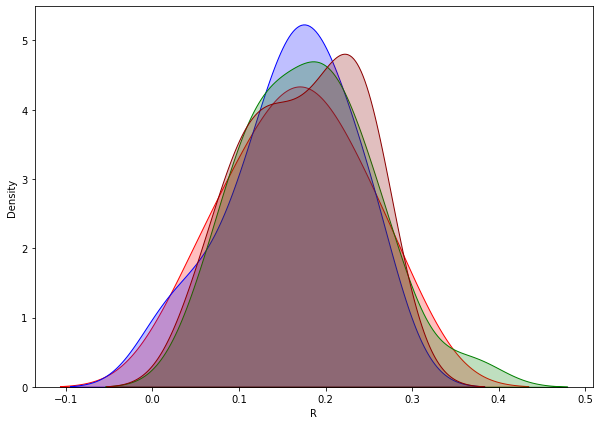

S


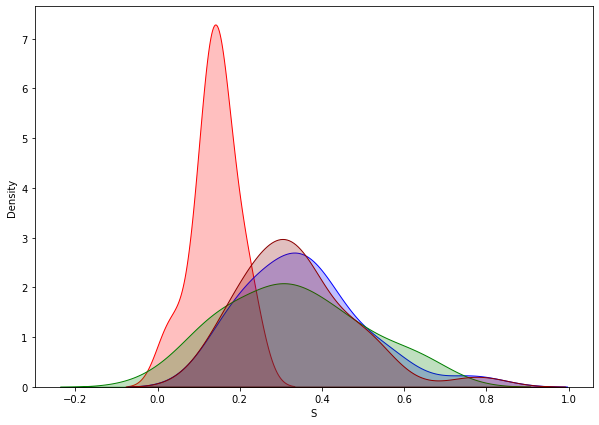

_


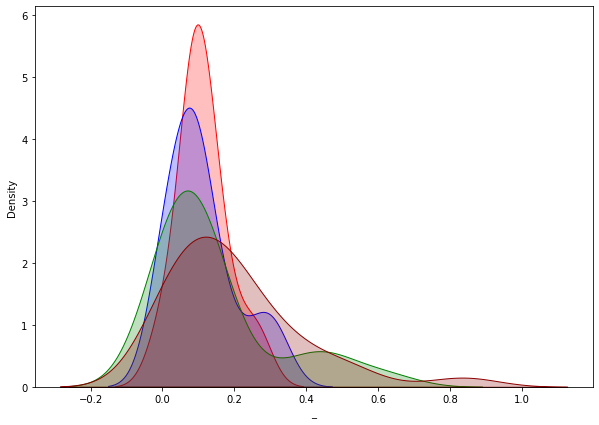

Y


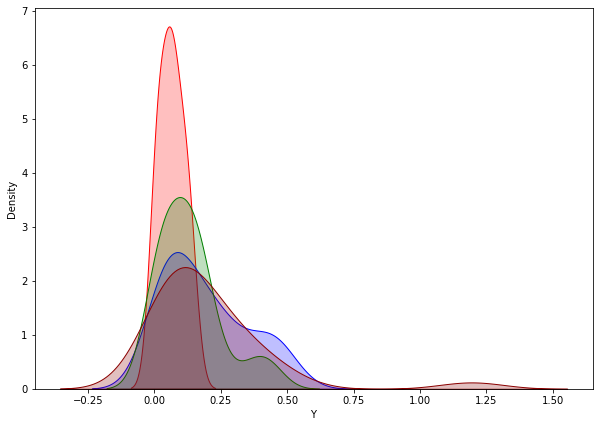

L


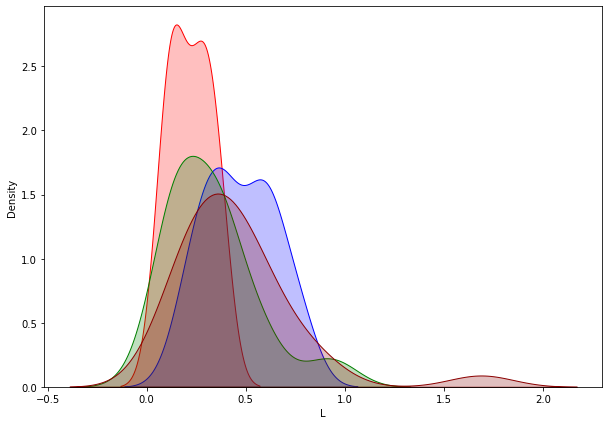

F


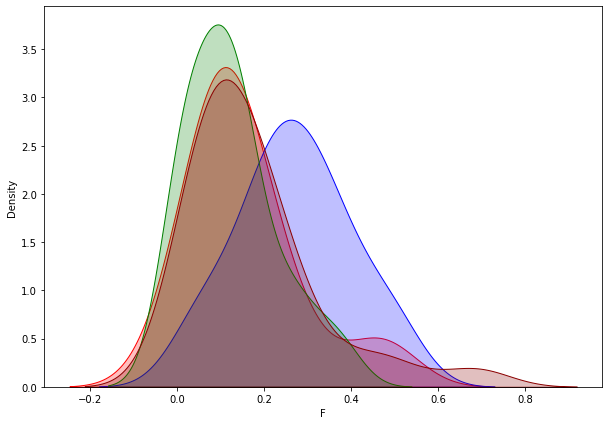

C


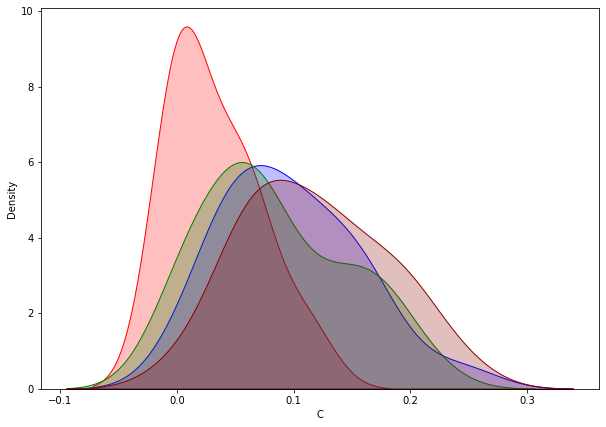

W


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


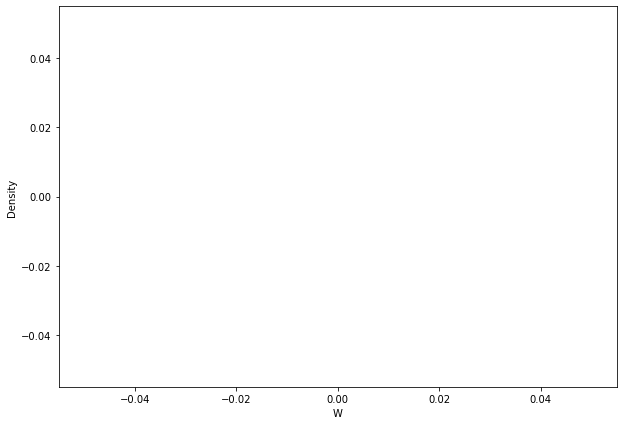

Q


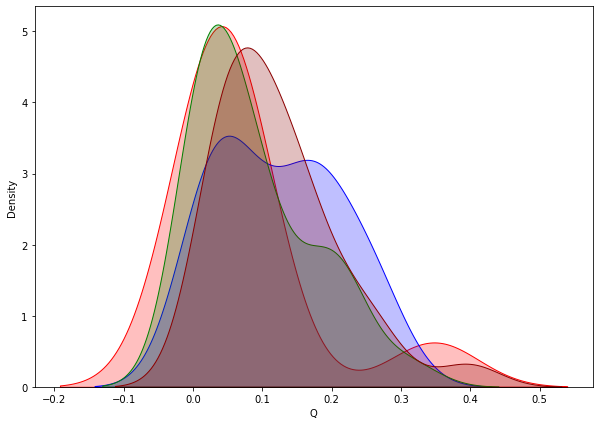

H


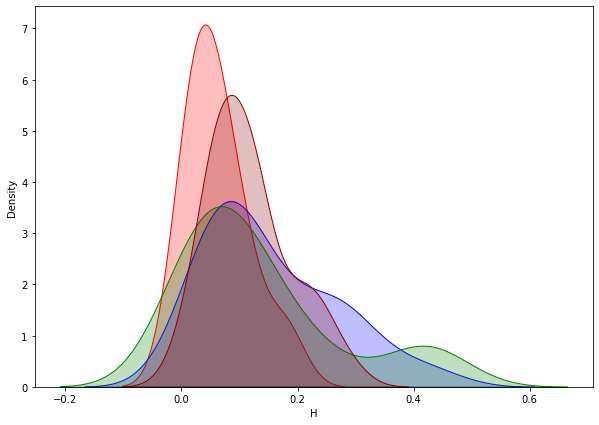

P


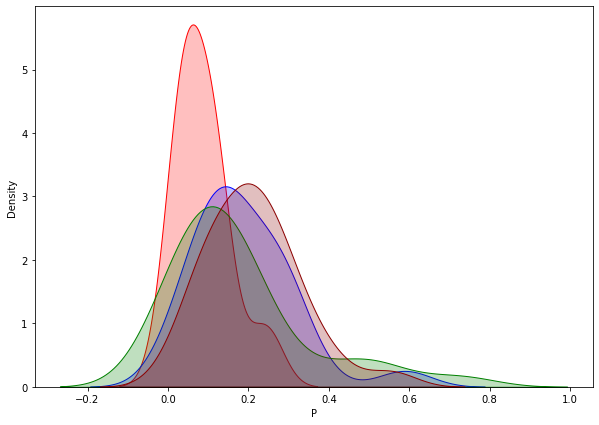

E


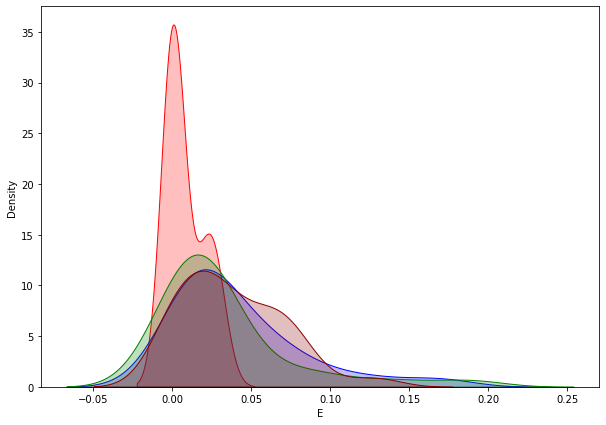

D


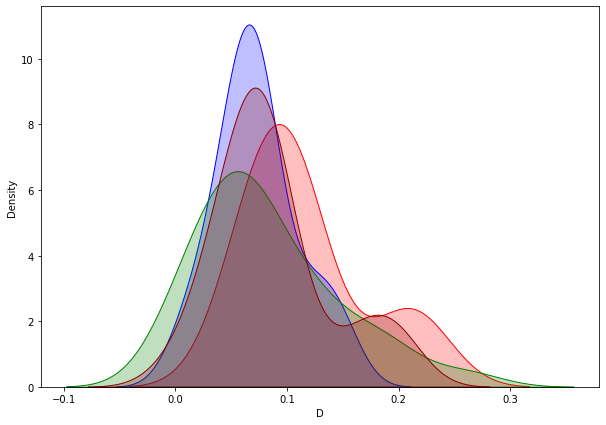

V


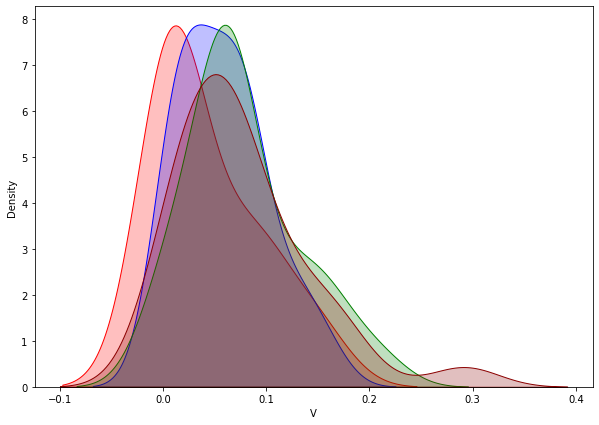

A


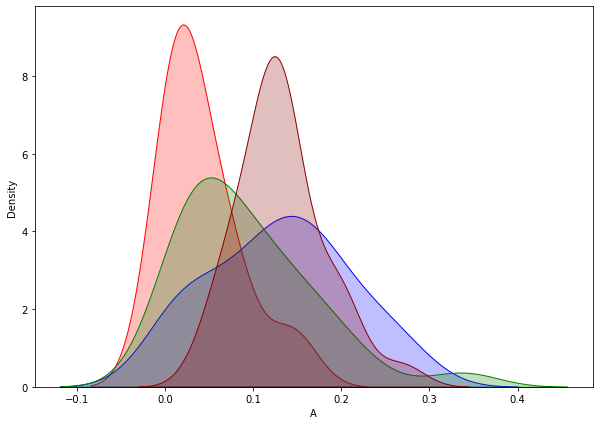

G


/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


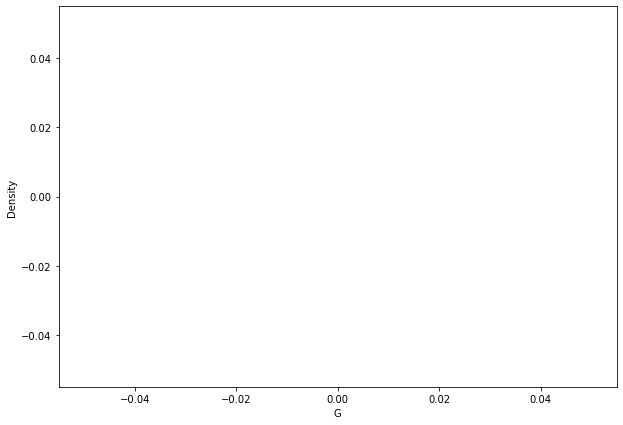

In [18]:
plt.rcParams['figure.figsize'] = [10, 7]
for col in dfAA.columns:
    if col not in ['Gene', 'GrpOrtho']:
        print(col)
        fig = sns.kdeplot(dfAA[dfAA.GrpOrtho == '13430'][col], shade=True, color="r")
        fig = sns.kdeplot(dfAA[dfAA.GrpOrtho == '10022'][col], shade=True, color="b")
        fig = sns.kdeplot(dfAA[dfAA.GrpOrtho == '293'][col], shade=True, color="g")
        fig = sns.kdeplot(dfAA[dfAA.GrpOrtho == '22'][col], shade=True, color="darkred")
        plt.show()